<a href="https://colab.research.google.com/github/cheul0518/DeepLearning/blob/main/NN_DL/Chapter3_MN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Undone exercise and problems
  - Ongoing problems: 8 and 13

# Exercise

1. Verify that $\sigma'(z)=\sigma(z)(1-\sigma(z))$
  - $\sigma(z)\equiv\frac{1}{1+e^{-z}}$
  - $\sigma'(z)=\frac{\partial}{\partial x}(1+e^{-z})^{-1}=(1+e^{-z})^{-2}e^{-z}=\frac{e^{-z}}{(1+e^{-z})^2}$
  - Add 1 and subtract 1 on the numerator:
    - $\frac{1+e^{-z}-1}{(1+e^{-z})^2}=\frac{1+e^{-z}}{(1+e^{-z})^2}-\frac{1}{(1+e^{-z})^2}=\frac{1}{(1+e^{-z})}-\frac{1}{(1+e^{-z})^2}=\sigma(z)-\sigma(z)^2=\sigma(z)(1-\sigma(z))$
  - Hence, $\sigma'(z)=\sigma(z)(1-\sigma(z))$


2. One gotcha with the cross-entropy is that it can be diffuclt at first to remember the respective roles of the $y$s and $a$s. It's easy to get confused about whether the right form is $-[y\ ln(a) + (1-y)ln(1-a)]$ or $-[a\ ln(y) + (1-a)ln(1-y)]$. What happens to the second of these expressions when $y=0$ or $1$? Does this problem afflict the first expression? Why or why not?
  - At $y=0$ and $y=1$, the second expression is $-[a\ ln(0) + (1-a)ln(1)]$, and $-[a\ ln(1) + (1-a)ln(0)]$ respectively. $ln(0)$ is undefined so the second expression cannot be the right form for the cross-entropy.
  - $-[y\ ln(a) + (1-y)ln(1-a)]$ is not affected by any value of $y$. However, there would be a chance of having the same problem when $a=0$ or $a=1$, because $ln(0)$ is not defined. However, such case won't occur because $a$ is a sigmoid function and its inputs must be either $-\infty$ or $\infty$ so as to be either $a=0$ or $a=1$. Practically, $-\infty$ or $\infty$ is unachievable. Thus, this problem will not afflict the first expression.
  

3. In the single neuron discussion at the start of this section, I argued that the cross-entropy is small if $\sigma (z)\approx y$ for all training inputs. The argument relied on $y$ being equal to either 0 or 1. This is usually true in classification problems, but for other problems (e.g., regression problems) $y$ can sometimes take values intermediate between 0 and 1. Show that the cross entropy is still minimized when $\sigma (z)=y$ for all training inputs. When this is the case the cross-entropy has the value: $C= -\frac {1}{n} \sum_{x}[y\ ln\ y+(1-y)\ ln\ (1-y)]$\
 The quantity $-[y\ ln\ y+(1-y)\ ln\ (1-y)]$ is sometimes known as the binary entropy.
  - $C_x = -[y\ ln\ y+(1-y)\ ln\ (1-y)]$ when $\sigma(z)=y$. This is exactly same as the binary entrophy and it can be shown as below:

    <div>
<img src = "https://raw.githubusercontent.com/cheul0518/DeepLearning/main/NN_DL/img/binaryEntropy_v2.png" width = "30%">
</div>
  - As you see in the graph, $C_x$ is minimized as $y$ approaches either $0$ or $1$ for a arbitrary input $x$. $C$ is an average of $C_x$, and so cross entropy is still minimized when $\sigma (z)=y$ for all training inputs.

4. Construct an example showing explicitly that in a network with a sigmoid output layer, the output activations $a^L_j$ won't always sum to 1.
  - Suppose there is a network that consists of a single input neuron and three output neurons. Weights and biases  are $w_{11}=1, w_{21}=1, w_{31}=1, b_1=0, b_2=0$, and $b_3=0$. When $x=0$, the weighted inputs are $z_1=0, z_2=0, z_3=0$. And so the activations are $a_1=0.5, a_2=0.5, a_3=0.5$, which is $\sum_j {a_j} = 1.5$. Thus, the output activations $a^L_j$ won't always sum to 1.

5. **Monotonicity of softmax**. Show that $\frac{\partial a^L_j}{\partial z^L_k}$ is positive if $j=k$ and negative if $j\neq k$. As a consequence, increasing $z^L_j$ is guaranteed to increase the corresponding output activation, $a^L_j$, and will decrease all the other output activations. We already saw this empirically with the sliders, but this is a rigorous proof.
  - $\frac{\partial a^L_j}{\partial z^L_k} = \frac{\partial}{\partial z^L_k}(\frac{e^{z^L_j}}{\sum_k (e^{z^L_k})})$
  - when $j\neq k$, 
  \
  $\frac{\partial a^L_j}{\partial z^L_k} = \frac{\partial}{\partial z^L_k}\frac{e^{z^L_j}}{\sum_k (e^{z^L_k})} = \frac{\partial}{\partial z^L_k}e^{z^L_j}(\sum_ke^{z^L_k})^{-1} = -e^{z^L_j}(\sum_ke^{z^L_k})^{-2}e^{z^L_k}$
  \
  Because $e^{z^L_j}$, $(\sum_ke^{z^L_k})^{-2}$, and $e^{z^L_k}$ are all positive numbers, $\frac{\partial a^L_j}{\partial z^L_k} < 0$.
  - when $j = k$,
  \
  $\frac{\partial a^L_k}{\partial z^L_k} = \frac{\partial}{\partial z^L_k}\frac{e^{z^L_k}}{\sum_k (e^{z^L_k})} = \frac{\partial}{\partial z^L_k}e^{z^L_k}(\sum_k e^{z^L_k})^{-1} = e^{z^L_k}(\sum_k e^{z^L_k})^{-1} - e^{z^L_k}(\sum_k e^{z^L_k})^{-2}e^{z^L_k} = e^{z^L_k}(\sum_k e^{z^L_k})^{-1} - (e^{z^L_k})^2(\sum_k e^{z^L_k})^{-2}$
  \
  Because $0 \leq (e^{z^L_k})^2(\sum_k e^{z^L_k})^{-2} \leq e^{z^L_k}(\sum_k e^{z^L_k})^{-1} \leq 1$, $\frac{\partial a^L_j}{\partial z^L_k} > 0$.
  \
  \
  Thus, $\frac{\partial a^L_j}{\partial z^L_k}$ is positive if $j=k$ and negative if $j\neq k$.

6. **Non-locality of softmax**. A nice thing about sigmoid layers is that the output $a^L_j$ is a function of the corresponding weighted input, $a^L_j = \sigma(z^L_j)$. Explain why this is not the case for a softmax layer: any particular output activation $a^L_j$ depends on all the weighted inputs.
  - softmax layer output is $a^L_j = \frac {e^{z^L_j}}{\sum_ke^{z^L_k}}$. That is, every weigted input affects the value of $a^L_j$. You cannot have an isolate, unaffected value of $a^L_j$ of a softmax layer.

7. As discussed above, one way of expanding the MNIST training data is to use small rotations of training images. What's a problem that might occur if we allow arbitraritly large rotations of training images?
  - Let's say we rotate a digit, "6", by 180 degree. If such largely rotated data's trained, then a digit,"9", is likely to be recognized as "6". Thus, the trained neural network would not properly classify 6 and 9, lowering its classification accuracy.

8. Verify that the standard deviation of $z = \sum_jw_jx_j + b$ in the paragraph above is $\sqrt{\frac{3}{2}}$. It may help to know that: (a) the variance of a sum of independent random variables is the sum of the variances of the individual random variales; and (b) the variance is the square of the standard deviation: (a) $V(x+y) = V(x)+V()$, and (b) $Std(z) = \sqrt{V(z)}$.
  - $V(w) = \frac{1}{1000}, V(b) = 1$.
  - $V(z) = V(\sum_jw_jx_j + b) = \sum_jV(w_jx_j) + V(b) = 500\times\frac{1}{1000} + 1 = \frac{3}{2}$
  - $Std(z) = \sqrt{V(z)} = \sqrt{\frac{3}{2}}$

9. Modify network2.py so that it implements a learning schedule that: halves the learning rate each time the validation accuracy satisfies the no-improvement-in-10 rule; and terminates when the learning rate has dropped to 1/128 of its original value.

In [1]:
#@title network with learing rate schedule
"""network2.py
~~~~~~~~~~~~~~
A modified version of network2.py. Improvements include early stopping and 
learning rate schedule etc."""

#### Libraries
# Standard library
import json
import random
import sys


# Third-party libraries
import numpy as np


#### Define the quadratic and cross-entropy cost functions
class QuadraticCost(object):

      @staticmethod
      def fn(a, y):
          """Return the cost associated with an output "a" and desired output "y"."""
          return 0.5*np.linalg.norm(a-y)**2

      @staticmethod
      def delta(z, a, y):
          """Return the error delta from the output layer."""
          return (a-y) * sigmoid_prime(z)

class CrossEntropyCost(object):

      @staticmethod
      def fn(a,y):
          """Return the cost associated with an output "a" and desired output
          "y".  Note that np.nan_to_num is used to ensure numerical stability. 
          In particular, if both "a" and "y" have a 1.0 in the same slot, then 
          the expression (1-y)*np.log(1-a) returns nan.  The np.nan_to_num 
          ensures that that is converted to the correct value (0.0)."""
          return np.sum(np.nan_to_num(-y*np.log(a)-(1-y)*np.log(1-a)))

      @staticmethod
      def delta(z, a, y):
          """Return the error delta from the output layer.  Note that the
          parameter "z" is not used by the method.  It is included in the 
          method's parameters in order to make the interface consistent with 
          the delta method for other cost classes."""
          return (a-y)

#### Main Network class
class Network_lrs(object):

      def __init__(self, sizes, cost=CrossEntropyCost):
          """The list "sizes" contains the number of neurons in the respective
          layers of the network.  For example, if the list was [2, 3, 1]
          then it would be a three-layer network, with the first layer 
          containing 2 neurons, the second layer 3 neurons, and the third layer 
          1 neuron.  The biases and weights for the network are initialized 
          randomly, using "self.default_weight_initializer"."""
          self.num_layers = len(sizes)
          self.sizes = sizes
          self.default_weight_initializer()
          self.cost = cost


      def default_weight_initializer(self):
          """Initialize each weight using a Gaussian distribution with mean 0
          and standard deviation 1 over the square root of the number of
          weights connecting to the same neuron.  Initialize the biases
          using a Gaussian distribution with mean 0 and standard deviation 1.
          Note that the first layer is assumed to be an input layer, and
          by convention we won't set any biases for those neurons, since
          biases are only ever used in computing the outputs from later layers."""
          self.biases = [np.random.randn(y, 1) for y in self.sizes[1:]]
          self.weights = [np.random.randn(y, x)/np.sqrt(x) 
                          for y, x in zip(self.sizes[1:], self.sizes[:-1])]


      def large_weight_initializer(self):
          """Initialize the weights using a Gaussian distribution with mean 0
          and standard deviation 1.  Initialize the biases using a Gaussian 
          distribution with mean 0 and standard deviation 1. Note that the first
          layer is assumed to be an input layer, and by convention we won't set 
          any biases for those neurons, since biases are only ever used in 
          computing the outputs from later layers. This weight and bias 
          initializer uses the same approach as in Chapter 1, and is included 
          for purposes of comparison.  It will usually be better to use the 
          default weight initializer instead."""
          self.biases = [np.random.randn(y, 1) for y in self.sizes[1:]]
          self.weights = [np.random.randdn(y, x) 
                          for y, x in zip(self.sizes[1:], self.sizes[:-1])]


      def feedforward(self, a):
          """Return the output of the network if "a" is input."""
          for b,w in zip(self.biases, self.weights):
              a = sigmoid(np.dot(w,a)+b)
          return a


      def SGD(self, training_data, epochs, mini_batch_size, eta, lmbda = 0.0,
              evaluation_data=None, early_stopping=-1, monitor_evaluation_cost=False,
              monitor_evaluation_accuracy=False, monitor_training_cost=False,
              monitor_training_accuracy=False):
          """Train the neural network using mini-batch stochastic gradient
          descent.  The "training_data" is a list of tuples "(x, y)"
          representing the training inputs and the desired outputs.  The
          other non-optional parameters are self-explanatory, as is the 
          regularization parameter "lmbda".  The method also accepts 
          "evaluation_data", usually either the validation or test data.  We can
          monitor the cost and accuracy on either the evaluation data or the 
          training data, by setting the appropriate flags. The method returns 
          a tuple containing four lists: the (per-epoch) costs on the evaluation 
          data, the accuracies on the evaluation data, the costs on the training
          data, and the accuracies on the training data. All values are evaluated 
          at the end of each training epoch. So, for example, if we train 
          for 30 epochs, then the first element of the tuple will be a 30-element
          list containing the cost on the evaluation data at the end of each epoch. 
          Note that the lists are empty if the corresponding flag is not set."""
          if evaluation_data:
              evaluation_data = list(evaluation_data)
              n_data = len(evaluation_data)
          training_data = list(training_data)
          n = len(training_data)
          eta_init = eta

          while eta > eta_init*(2**-7):
                self.default_weight_initializer()
                evaluation_cost, evaluation_accuracy = [], []
                training_cost, training_accuracy = [], []            
                early_stopping = early_stopping            
                print(f"\n<Current learning rate is {eta}>")
                for j in range(epochs):
                    random.shuffle(training_data)
                    mini_batches = [training_data[k:k+mini_batch_size] 
                                    for k in range(0, n, mini_batch_size)]
                    for mini_batch in mini_batches:
                        self.update_mini_batch(mini_batch, eta, lmbda, len(training_data))
                    print(f"\tEpoch {j} training complete")
                    if monitor_training_cost:
                        cost = self.total_cost(training_data, lmbda)
                        training_cost.append(cost)
                        print(f"\tCost on training data: {cost}")
                    if monitor_training_accuracy:
                        accuracy = self.accuracy(training_data, convert=True)
                        training_accuracy.append(accuracy)
                        print(f"\tAccuracy on training data: {accuracy}/{n}")
                    if monitor_evaluation_cost:
                        cost = self.total_cost(evaluation_data, lmbda, convert=True)
                        evaluation_cost.append(cost)
                        print(f"\tCost on evaluation data: {cost}")
                    if monitor_evaluation_accuracy:
                        accuracy = self.accuracy(evaluation_data)
                        evaluation_accuracy.append(accuracy)
                        print(f"\tAccuracy on evaluation data: {100*accuracy/n_data:.2f}%")
                    # Early stopping
                    i_max = evaluation_accuracy.index(max(evaluation_accuracy))
                    if len(evaluation_accuracy[i_max:-1]) == early_stopping:
                        print(f"\t///Early stopped///")
                        print(f"\tHighest classification accuracy: {100*evaluation_accuracy[i_max]/n_data:.2f}% at Epoch {i_max}")
                        break
                eta = eta/2
          print("\nEta is the same as Eta/128 so the process's automatically terminated.")                
          # return evaluation_cost, evaluation_accuracy, training_cost, training_accuracy


      def update_mini_batch(self, mini_batch, eta, lmbda, n):
          """Update the network's weights and biases by applying gradient
          descent using backpropagation to a single mini batch.  The "mini_batch" 
          is a list of tuples "(x, y)", "eta" is the learning rate, "lmbda" is 
          the regularization parameter, and "n" is the total size of the training 
          data set."""
          nabla_b = [np.zeros(b.shape) for b in self.biases]
          nabla_w = [np.zeros(w.shape) for w in self.weights]

          # Partition the given minibatch into two groups: X and Y
          X = [mini_batch[i][0] for i in range(len(mini_batch))]
          Y = [mini_batch[i][1] for i in range(len(mini_batch))]
          delta_nabla_b, delta_nabla_w = self.backprop(X,Y)
          nabla_b = [nb+dnb for nb,dnb in zip(nabla_b, delta_nabla_b)]
          nabla_w = [nw+dnw for nw,dnw in zip(nabla_w, delta_nabla_w)]
          self.biases = [b-(eta/len(mini_batch))*nb for b, nb in zip(self.biases, nabla_b)]
          self.weights = [(1-eta*(lmbda/n))*w-(eta/len(mini_batch))*nw 
                          for w, nw in zip(self.weights, nabla_w)]

      def backprop(self, x, y):
          """Return a tuple "(nabla_b, nabla_w)" representing the gradient for 
          the cost function C_x. "nabla_b" and "nabla_w" are layer-by-layer lists 
          of numpy arrays, similar to "self.biases" and "self.weights"."""
          nabla_b = [np.zeros(b.shape) for b in self.biases]
          nabla_w = [np.zeros(w.shape) for w in self.weights]
          # Make X and Y ndarrays from lists
          X = np.concatenate(x, axis=1)
          Y = np.concatenate(y, axis=1)
          # Feedforward
          activation = X
          activations = [X] # list to store all the activations, layer by layer 
          zs = [] # list to store all the z vectors, layer by layer
          for b, w in zip(self.biases, self.weights):
              z = np.dot(w, activation) + b
              zs.append(z)
              activation = sigmoid(z)
              activations.append(activation)
          # Backward pass
          delta = (self.cost).delta(zs[-1], activations[-1], Y)
          nabla_b[-1] = delta
          nabla_w[-1] = np.dot(delta, activations[-2].transpose())
          for l in range(2, self.num_layers):
              z = zs[-l]
              sp = sigmoid_prime(z)
              delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
              nabla_b[-l] = delta
              nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
          # each ndarry in nabla_b gotta be summed along columns, and reshaped
          for i in range(len(nabla_b)):
              nabla_b[i] = nabla_b[i].sum(axis=1).reshape(nabla_b[i].shape[0],1)
          return nabla_b, nabla_w

      def accuracy(self, data, convert=False):
          """Return the number of inputs in "data" for which the neural network 
          outputs the correct result. The neural network's output is assumed to 
          be the index of whichever neuron in the final layer has the highest 
          activation. The flag "convert" should be set to False if the data set 
          is validation or test data (the usual case), and to True if the data 
          set is the training data. The need for this flag arises due to 
          differences in the way the results "y" are represented in the different 
          data sets. In particular, it flags whether we need to convert between 
          the different representations.  It may seem strange to use different
          representations for the different data sets.  Why not use the same 
          representation for all three data sets?  It's done for efficiency 
          reasons - the program usually evaluates the cost on the training data 
          and the accuracy on other data sets. These are different types of 
          computations, and using different representations speeds things up.
          More details on the representations can be found in mnist_loader.load_data_wrapper."""
          if convert:
              results = [(np.argmax(self.feedforward(x)), np.argmax(y))
                          for (x,y) in data]
          else:
              results = [(np.argmax(self.feedforward(x)), y)
                          for (x,y) in data]
          return sum(int(x==y) for (x,y) in results)

      def total_cost(self, data, lmbda, convert=True):
          """Return the total cost for the data set "data". The flag "convert" 
          should be set to False if the data set is the training data (the usual 
          case), and to True if the data set is the validation or test data.
          See comments on the similar (but reversed) convention for the "accuracy" method, above."""
          cost = 0.0
          for x, y in data:
              a = self.feedforward(x)
              if convert:
                  y = vectorized_results(y)
              cost += self.cost.fn(a,y)/len(data)
          cost += 0.5(lmbda/len(data))*sum(np.linalg.norm(w)**2
                                           for w in self.weights)
          return cost

      def save(self, filename):
          """Save the neural network to the file "filename"."""
          data = {"sizes": self.sizes,
                  "weights": [w.tolist() for w in self.weights],
                  "biases": [b.tolist() for b in self.biases],
                  "cost": str(self.cost.__name__)}
          f = open(filename, "w")
          json.dump(data, f)        
          f.close()


#### Loading a Network
def load(filename):
    """Load a neural network from the file "filename". Returns an instance of Network."""
    f = open(filename, "r")
    data = json.load(f)
    f.close()
    cost = getattr(sys.modules[__name__], data["cost"])
    net = Network(data["sizes"], cost=cost)
    net.weights = [np.array(w) for w in data["weights"]]
    net.biases = [np.array(b) for b in data["biases"]]
    return net


#### Miscellaneous functions
def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the j'th position and 
    zeroes elsewhere.  This is used to convert a digit (0...9) into a corresponding 
    desired output from the neural network."""
    e = np.zeros((10,1))
    e[j] = 1.0
    return e


def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))


def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

In [ ]:
#@title Download the MNIST data set and minist_loader.py
#Download the dataset from Nielsen's github
!wget -L https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz

#Download mnist_loader.py from Dobrzanski's github: his version's for python 3
!wget -L https://raw.githubusercontent.com/MichalDanielDobrzanski/DeepLearningPython/master/mnist_loader.py

In [3]:
#@title Learning rate schedule
import mnist_loader

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
net_lrs = Network_lrs([784,30,10])
net_lrs.SGD(training_data, 30, 10, eta = 10, lmbda = 3.0, evaluation_data=validation_data, monitor_evaluation_accuracy=True, early_stopping=10)


<Current learning rate is 10>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:294: RuntimeWarning: overflow encountered in exp


	Epoch 0 training complete
	Accuracy on evaluation data: 55.14%
	Epoch 1 training complete
	Accuracy on evaluation data: 68.53%
	Epoch 2 training complete
	Accuracy on evaluation data: 82.30%
	Epoch 3 training complete
	Accuracy on evaluation data: 75.41%
	Epoch 4 training complete
	Accuracy on evaluation data: 62.27%
	Epoch 5 training complete
	Accuracy on evaluation data: 58.14%
	Epoch 6 training complete
	Accuracy on evaluation data: 65.62%
	Epoch 7 training complete
	Accuracy on evaluation data: 67.57%
	Epoch 8 training complete
	Accuracy on evaluation data: 53.39%
	Epoch 9 training complete
	Accuracy on evaluation data: 71.78%
	Epoch 10 training complete
	Accuracy on evaluation data: 53.34%
	Epoch 11 training complete
	Accuracy on evaluation data: 56.40%
	Epoch 12 training complete
	Accuracy on evaluation data: 63.35%
	///Early stopped///
	Highest classification accuracy: 82.30% at Epoch 2

<Current learning rate is 5.0>
	Epoch 0 training complete
	Accuracy on evaluation data: 85.

10. It's tempting to use gradient descent to try to learn good values for hyper-parameters such as $\lambda$ and $\eta$. Can you think of an obstacle to using gradient descent to determine $\lambda$? Can you think of an obstacle to using gradient descent to determine $\eta$?
  - $C = C_0 + \frac{\lambda}{2n}L_k$, where $L_1 = \sum_ww$ and $L_2 = \sum_ww^2$
  - The cost function above is $C(w,\lambda)$. You can't compute the gradient of $\eta$ with cost function that is nothing to do with the variable $\eta$.
  - From cost function, you can derive $\frac{\partial C}{\partial \lambda} = \frac{L_k}{2n}$. This is a constant so that $\lambda$ continuously decrease or increase. Thus, you cannot compute its extremum.

11. What would go wrong if we used $\mu > 1$ in the momentum technique? What would go wrong if we used $\mu < 0$ in the momentum technique?
  - For $\mu > 1$, the GD is likely to overshoot while for $\mu < 0 $ it is likely to either be ridiculously slow($-1<\mu< 0$) or overshoot($\mu<-1$). Check the codes below

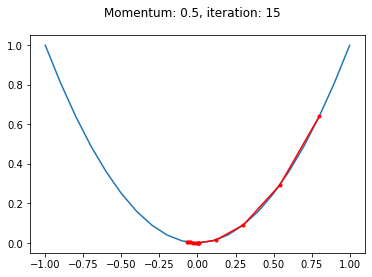

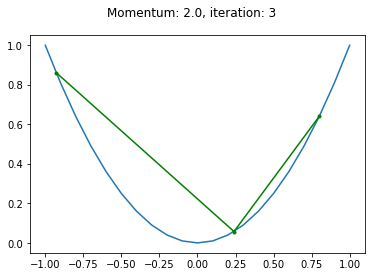

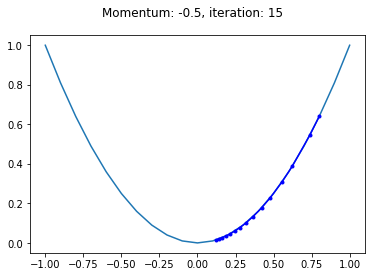

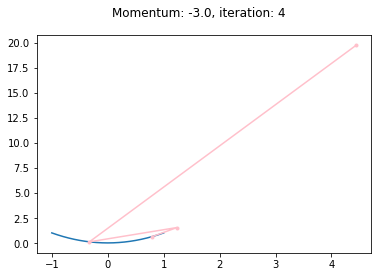

In [5]:
#@title 11. momentum comparison
# Original codes from Jason Brownlee: https://machinelearningmastery.com/gradient-descent-with-momentum-from-scratch/
# The codes are a bit modifed to compare the momentum coefficient values

from matplotlib import pyplot
import numpy as np

def f(x):
    """f(x) = x**2"""
    return x**2
def f_prime(x):
    """f'(x) = 2x"""
    return 2*x

def MGD(epoches, eta, mu):
    """It performs momentum gradient descent."""
    w_axis, C_axis = [],[]
    w = 1.0
    v = 0.0
    for epoch in range(epoches):
        nabla_C = f_prime(w)
        v_update = mu * v - eta * nabla_C
        w = w + v_update
        v = v_update
        C = f(w)
        w_axis.append(w)
        C_axis.append(C)
    return w_axis, C_axis

# Set x and y for comparison
x = np.arange(-1.0, 1.1, 0.1)
y = f(x)

#fig1
fig1 = pyplot.figure()
fig1.suptitle("Momentum: 0.5, iteration: 15")
w1, C1 = MGD(epoches=15, eta=0.1, mu=0.5)
pyplot.plot(x, y)
pyplot.plot(w1,C1,'.-', color='red')

#fig2
fig2 = pyplot.figure()
fig2.suptitle("Momentum: 2.0, iteration: 3")
w2, C2 = MGD(epoches=3, eta=0.1, mu=2.0)
pyplot.plot(x, y)
pyplot.plot(w2, C2,'.-', color='green')

#fig3
fig3 = pyplot.figure()
fig3.suptitle("Momentum: -0.5, iteration: 15")
w3, C3 = MGD(epoches=15, eta=0.1, mu=-0.5)
pyplot.plot(x, y)
pyplot.plot(w3,C3,'.-', color='blue')

#fig4
fig4 = pyplot.figure()
fig4.suptitle("Momentum: -3.0, iteration: 4")
w4, C4 = MGD(epoches=4, eta=0.1, mu=-3.0)
pyplot.plot(x, y)
pyplot.plot(w4,C4,'.-', color='pink')

pyplot.show()

12. Prove the identity in equation $\sigma(z) = \frac{1+tanh(z/2)}{2}$
  - $tanh(z) \equiv \frac{e^z-e^{-z}}{e^z+e^{-z}} = \frac{1-e^{-2z}}{1+e^{-2z}}$. Subsititue $z$ for $\frac{z}{2}$. Then $tanh(\frac{z}{2})=\frac{1-e^{-z}}{1+e^{-z}} = \frac{1}{1+e^{-z}} - \frac{e^{-z}}{1+e^{-z}}$. 
  - $\sigma(z) = \frac{1}{1+e^{-z}} \to e^{-z} = \frac{1-\sigma(z)}{\sigma(z)}$
  - Subsitute $e^{-z}$ in $tanh(\frac{z}{2})$, then $tanh(\frac{z}{2}) = \sigma(z) - (1-\sigma(z)) = 2\sigma(z) - 1$. 
  - Hence, $\sigma(z) = \frac{1 + tanh(z)}{2}$.

# Problems

1. **Many-layer multi-neuron networks**. In the notation introduced in the last chapter, show that for the quadratic cost the partial derivative with respect to weights in the output layer is $\frac{\partial C} {\partial W^L_{jk}} = \frac{1}{n}\sum_x a^{L-1}_k (a^L_j - y_j)\sigma'(z^L_j)$. The term $\sigma'(z^L_j)$ causes a learning slowdown whenever an output neuron saturates on the wrong value. Show that for the cross-entropy cost the output error $\delta^L$ for a single training example $x$ given by $\delta = a^L - y$. Use this expression to show that the partial derivative with respect to the weights in the output layer is given by $\frac{\partial C} {\partial W^L_{jk}} = \frac{1}{n}\sum_x a^{L-1}_k (a^L_j - y_j)$. The $\sigma'(z^L_j)$ term has vanished , and so the cross entropy avoids the problem of learning slowdonw, not just when used with a single neuron, as we saw earlir, but also in many-layer multi-neuron networks. A simple variation on this analysis holds also for the biases. If this is not obvious to you, then you should work through that analysis as well.
  - For cross entropy cost, the output error $\delta^L$ for a single training example $x$ is, $\delta^L = \frac{\partial C_x}{\partial z^L} = \frac{\partial C_x}{\partial a^L}\frac{\partial a^L}{\partial z^L} = \frac{\partial C_x}{\partial a^L}\sigma'(z^L) = (\frac{y}{a^L} + \frac{1-y}{1-a^L})\sigma'(z^L) = \frac{y-a^L}{a^L(1-a)^L}\sigma'(z^L) = \frac{y-a^L}{a^L(1-a)^L}(1-a^L)a^L = y-a^L$
  - For a single training example, $\frac{\partial C}{\partial w^L_{jk}} = a^{L-1}_k \delta^L_j = a^{L-1}_k (a^L_j - y_j)$. 
  - For all training examples, sum each $\frac{\partial C}{\partial w^L_{jk}}$ per $x$ and divide by $n$, and so $\frac{\partial C}{\partial w^L_{jk}} = \frac{1}{n}\sum_xa^{L-1}_k\delta^L_j = \frac{1}{n}\sum_xa^{L-1}_k (a^L_j - y_j)$
  - $\frac{\partial C}{\partial b^L_j} = \delta^L_j = y-a^L$ for a single training example.
  \
  \
  Thus, both $\frac{\partial C}{\partial w^L_{jk}}$ and $\frac{\partial C}{\partial b^L_j}$ do not have $\sigma'(z^L_j)$ that causes a learning slowdown.

2. **Using the quadratic cost when we have linear neurons in the output layer**. Suppose that we have a many-layer multi-neuron network. Suppose all the neurons in the final layer are linear neurons, meaning that the sigmoid activation function is not applied, and the outputs are simply $a^L_j = z^L_j$. Show that if we use the quadratic cost function then the output error $\delta^L$ for a single training exdample $x$ is given by $\delta^L = a^L - y$. Similarly to the previous problem, use this expression to show that the partial derivatives with respect to the weights and biases in the output layer are given by 
\
$\frac{\partial C}{\partial w^L_{jk}} = \frac{1}{n}\sum_x a^{L-1}_k(a^L_j-y_j)$
\
$\frac{\partial C}{\partial b^L_j} = \frac{1}{n}\sum_x (a^L_j-y_j)$. 
\
 This shows that if the output neurons are linear neurons then the quadratic cost will not give rise to any problems with a learning slowdown. In this case the quadratic cost is, infact, an appropriate cost function to use.
  - $\delta^L = \frac {\partial C}{\partial a^L}\sigma'(z^L)$, and $\sigma'(z^L)$ is 1. So, $\delta^L = \frac {\partial C}{\partial a^L} = a^L_j-y_j$
  -  $\frac{\partial C}{\partial w^L_{jk}} = a^{L-1}_k \delta^L_j = a^{L-1}_k(a^L_j-y_j)$. For all training examples of $x$, $\frac{\partial C}{\partial w^L_{jk}} = \frac{1}{n}\sum_x a^{L-1}_k(a^L_j-y_j)$
  - $\frac{\partial C}{\partial b^L_j} = \delta^L_j = a^L_j-y_j$. For all training examples of $x$, $\frac{\partial C}{\partial b^L_j} = \frac{1}{n}\sum_xa^L_j-y_j$.
  \
  \
Thus, the quaractic cost will not cause a learning slowdown if all the neurons in the final layers are linear neurons.

3. We've discussed at length the learning slowdown that can occur when output neurons saturate, in networks using the quadratic cost to train. Another factor that may inhibit learning is the presence of the $x_j$ term in equation $\frac{\partial C}{\partial w_j} = \frac{1}{n}\sum_xx_j(\sigma(z)-y)$. Because of this term, when an input $x_j$ is near to zero, the corresponding weight $w_j$ will learn slowly. Explain why it is not possible to eliminate the $x_j$ term through a clevel choice of cost function.
  - Let's say $\frac{\partial C}{\partial w_j} = \sigma(z)-y = a-y$ without $x_j$
  - $\frac{\partial C}{\partial w_j} = \frac{\partial C}{\partial a}\frac{\partial a}{\partial w_j} = \frac{\partial C}{\partial a}x_j\sigma'(z) = \frac{\partial C}{\partial a}x_j(1-a)a = a-y$
  - $\frac{\partial C}{\partial a} = \frac{a-y}{x_j(1-a)a}$, and $x_j$ occurs so that $x_j$ cannot be elimintaed from Cross Entropy.
  - In general case, $\frac{\partial C}{\partial a} = \frac{math-expression}{x_j(1-a)a}$. In order to remove $x_j$, $\frac{\partial C}{\partial w_j}$ is ought to be ($x_j\times$(math expression)).  But we would like to have $\frac{\partial C}{\partial w_j}$ without $x_j$ so it cannot be achievable.
  \
  \
  Thus, elimintating the $x_j$ term is not possible in any clevel choice of cost function.

4. **Inverting the softmax layer**. Suppose we have a neural network with a softmax output layer, and the activations $a^L_j$ are known. Show that the corresponding weighted inputs have the form $z^L_j = ln\ a^L_j+C$ for some constant $C$ that is indepdent of $j$
  - $a^L_j = \frac {e^{z^L_j}}{\sum_ke^{z^L_k}} \to a^L_j\sum_ke^{z^L_k}=e^{z^L_j}$. Apply $ln$ to both sides, then $ln\ a^L_j + ln\sum_ke^{z^L_k}=ln\ e^{z^L_j}$. $ln\sum_ke^{z^L_k}$ is some constant $C$ that is independent of $j$. 
  \
  \
  Thus, $z^L_j=ln\ a^L_j + C$

5. **Derive equations** $\frac{\partial C}{\partial b^L_j} = a^L_j - y_j$ and $\frac{\partial C}{\partial w^L_{jk}} = a^{L-1}_k(a^L_j - y_j)$
  - $C \equiv -ln\ a^L_y, \frac{\partial C}{\partial a^L_y} = -\frac{1}{a^L_y}$
  - $\frac{\partial C}{\partial b^L_j} = \sum_k \frac{\partial C}{\partial a^L_k}\frac{\partial a^L_k}{\partial b^L_j} = \frac{\partial C}{\partial a^L_y}\frac{\partial a^L_y}{\partial b^L_j}$, because $C$ is affected only by $a^L_y$. Now we have to consider two cases: $y=j$ or $y\neq j$ because $\frac{\partial a^L_y}{\partial b^L_j}$ would be different for each case.
    - When $y=j$, $\frac{\partial C}{\partial a^L_j}\frac{\partial a^L_j}{\partial b^L_j} = -\frac{1}{a^L_j}\frac{\partial}{\partial b^L_j}exp(z^L_j)(\sum_kexp(z^L_k))^{-1} = -\frac{1}{a^L_j}(exp(z^L_j)(\sum_kexp(z^L_k))^{-1}-exp(z^L_j)^2(\sum_kexp(z^L_k))^{-2})=-\frac{1}{a^L_j}(1-a^L_j)a^L_j = a^L_j - 1 = a^L_j - y_j$ 
      - $y_j$ is a vector whose all 0s is except for a 1 in the $j^{th}$ location. Thus, $1$ for here can be substituted for $y_j$.
    - When $y\neq j$, $\frac{\partial C}{\partial a^L_y}\frac{\partial a^L_y}{\partial b^L_j} = -\frac{1}{a^L_y}\frac{\partial}{\partial b^L_j}exp(z^L_y)(\sum_kexp(z^L_k))^{-1} = \frac{1}{a^L_y}exp(z^L_y)(\sum_kexp(z^L_k))^{-2}exp(z^L_j) = \frac{1}{a^L_y}a^L_ya^L_j = a^L_j = a^L_j - 0 = a^L_j - y_j$
      - $y_j$ is a vector whose all 0s is except for a 1 in the $y^{th}$ location. Thus, $0$ for here can be substituted for $y_j$.
      
    - Thus,  $\frac{\partial C}{\partial b^L_j} = a^L_j - y_j$

  - $\frac{\partial C}{\partial w^L_{jk}} = \sum_i\frac{\partial C}{\partial a^L_i}\frac{\partial a^L_i}{\partial w^L_{jk}} = \frac{\partial C}{\partial a^L_y}\frac{\partial a^L_y}{\partial w^L_{jk}}$, because $C$ is affected only by $a^L_y$. Now we have to consider two cases: $y=j$ or $y\neq j$ because $\frac{\partial a^L_y}{\partial w^L_{jk}}$ would be different for each case.
    - When $y=j$, $\frac{\partial C}{\partial a^L_y}\frac{\partial a^L_y}{\partial w^L_{jk}} = -\frac{1}{a^L_j}\frac{\partial}{\partial w^L_{jk}}exp(z^L_j)(\sum_kexp(z^L_k))^{-1} = -\frac{1}{a^L_j}(exp(z^L_j)(\sum_kexp(z^L_k))^{-1}a^{L-1}_k - (exp(z^L_j)^2(\sum_kexp(z^L_k))^{-2}a^{L-1}_k) = -\frac{1}{a^L_j}(1-a^L_j)a^L_ja^{L-1}_k = a^{L-1}_k(a^L_j-1) = a^{L-1}_k(a^L_j-y_j)$
      - $y_j$ is a vector whose all 0s is except for a 1 in the $j^{th}$ location. Thus, $1$ for here can be substituted for $y_j$.
    - when $y\neq j$, $\frac{\partial C}{\partial a^L_y}\frac{\partial a^L_y}{\partial w^L_{jk}} = -\frac{1}{a^L_y}\frac{\partial}{\partial w^L_{jk}}exp(z^L_y)(\sum_kexp(z^L_k))^{-1} = \frac{1}{a^L_y}exp(z^L_y)(\sum_kexp(z^L_k))^{-2}a^{L-1}_kexp(z^L_j) = \frac{1}{a^L_y}a^L_ya^{L-1}_Ka^L_j = a^{L-1}_ka^L_j = a^{L-1}_k(a^L_j-0) = a^{L-1}_k(a^L_j-y_j)$
      - $y_j$ is a vector whose all 0s is except for a 1 in the $y^{th}$ location. Thus, $0$ for here can be substituted for $y_j$.

    - Thus, $\frac{\partial C}{\partial w^L_{jk}} = a^{L-1}_k(a^L_j - y_j)$


6. **Where does the "softmax" name come from?** Suppose we change the softmax function so the output activations are given by $a^L_j = \frac{e^{cz^L_j}}{\sum_ke^{cz^L_k}}$, where $c$ is a positive constant. Note that $c=1$ corresponds to the standard softmax function. But if we use a different value of $c$ we get a different function, which is nonethelss qualitatively rather similar to the softmax. In particular, show that the output activations form a probability distribution, just as for the usual softmax. Suppose we allow $c$ to become large, i.e., $c \to \infty$. What is the limiting value for the output activations $a^L_j$? After solving this problem it should be clear to you why we think of the $c=1$ function as a "softened" version of the maximum function. This is the original of the term "softmax".
  - The output activations satisfies all the kolmogorov axioms: $P(X\in E)\geq 0\ \forall E \in A$,where $E$ is some event, and $A$ is event space; $P(A) = 1$; $P(X \in \sqcup E_i) = \sum_i P(X \in E_i)$. Thus, the output activations form a probability distribution.
  - The limiting value for the output activations $a^L_j$: $\lim_{c\to \infty} a^L_j = \lim_{c \to \infty}\frac{e^{cz^L_j}}{\sum_ke^{cz^L_k}}\ \approx 1$ if $z^L_j$ is the maximum weighted input; otherwise, $\lim_{c\to \infty} a^L_j = \lim_{c \to \infty}\frac{e^{cz^L_j}}{\sum_ke^{cz^L_k}}\ \approx 0$. This is because exponential function increases the maximum input a lot more rapidly than other non maximum inputs. For $n$ multiple maximum weighted inputs: $\lim_{c\to \infty} a^L_j = \lim_{c \to \infty}\frac{e^{cz^L_j}}{\sum_ke^{cz^L_k}}\ \approx \frac{1}{n}$. 
  - Thus, this function becomes a smooth approximation to the maximum function(technically, the arg max function because it depends on the index of $j$), as $c \to \infty$. 
  - We see for $c > 1$, $a^L_j$ works as the hardmax. What about $c < 1$? Let's say $c = \frac{1}{100}$. If there is a difference of 5, then $a^L_j(0,5) = (\frac{1}{1+e^\frac{1}{20}},\frac{e^\frac{1}{20}}{1+e^\frac{1}{20}}) = (0.51,0.49)$. Now the value is not close to the argmax. For $c=1$, $a^L_j(0,5) = (\frac{1}{1+e^5},\frac{e^5}{1+e^5}) =(0.007,0.993)$, which is a softened version of the hardmax (0,1).



7. **Backpropagation with softmax and thelog-likelihood cost**. In the last chapter we derived the backpropagation algorithm for a network containing sigmoid layers. To apply the algorithm to a network with a softmax layer we need to figure out an expression for the error $\delta^L_j \equiv \frac{\partial C}{\partial z^L_j}$ in the final layer. Show that a suitable expression is $\delta^L_j = a^L_j - y_j$. Using this expression we can apply the backpropagation algortihm to a network using a softmax output layer and the log-likelihood cost.
  - $\delta^L_j \equiv \frac{\partial C}{\partial z^L_j} = \sum_k\frac{\partial C}{\partial a^L_k}\frac{\partial a^L_k}{\partial z^L_j} =\frac{\partial C}{\partial a^L_y}\frac{\partial a^L_y}{\partial z^L_j}$ because $C$ is affected only by $a^L_y$. Now we have to consider two cases: $y=j$ or $y\neq j$ because $\frac{\partial a^L_y}{\partial z^L_j}$ would be different for each case.
    - When $y=j$, $\frac{\partial C}{\partial a^L_j}\frac{\partial a^L_j}{\partial z^L_j} = -\frac{1}{a^L_j}\frac{\partial}{\partial z^L_j}exp(z^L_j)(\sum_kexp(z^L_k))^{-1} = -\frac{1}{a^L_j}(exp(z^L_j)(\sum_kexp(z^L_k))^{-1}-exp(z^L_j)^2(\sum_kexp(z^L_k))^{-2})=-\frac{1}{a^L_j}(1-a^L_j)a^L_j = a^L_j - 1 = a^L_j - y_j$
      - $y_j$ is a vector whose all 0s is except for a 1 in the $j^{th}$ location. Thus, $1$ for here can be substituted for $y_j$.
    - When $y\neq j$, $\frac{\partial C}{\partial a^L_y}\frac{\partial a^L_y}{\partial z^L_j} = -\frac{1}{a^L_y}\frac{\partial}{\partial z^L_j}exp(z^L_y)(\sum_kexp(z^L_k))^{-1} = \frac{1}{a^L_y}exp(z^L_y)(\sum_kexp(z^L_k))^{-2}exp(z^L_j) = \frac{1}{a^L_y}a^L_ya^L_j = a^L_j = a^L_j - 0 = a^L_j - y_j$
      - $y_j$ is a vector whose all 0s is except for a 1 in the $y^{th}$ location. Thus, $0$ for here can be substituted for $y_j$.
  - Thus, $\delta^L_j = a^L_j - y_j$
  

8. **(Research problem)** How do our machine learning algorithms perform in the limit of very large data sets? For any given algorithm it's natural to attempt to define a notion of asymptotic performance in the limit of truly big data. A quick-and-dirty approach to this problem is to simply try fitting curves to graphs like those shown above, and then to extrapolate the fitted curves out to infinity. An objection to this approach is that different approaches to curve fitting will give different notions of asymptotic performance. Can you find a principled justification for fitting to some particular class of curves? If so, compare the asymptotic performance of several different machine learning algorithms. 

In [ ]:
#@title SGD with L2
"""network2.py
~~~~~~~~~~~~~~
A modified version of network2.py. Improvements include L2 regularization and
matrix multiplication. For caution, this code does not include unzip in its code"""

#### Libraries
# Standard library
import json
import random
import sys


# Third-party libraries
import numpy as np


#### Define the quadratic and cross-entropy cost functions
class QuadraticCost(object):

      @staticmethod
      def fn(a, y):
          """Return the cost associated with an output "a" and desired output "y"."""
          return 0.5*np.linalg.norm(a-y)**2

      @staticmethod
      def delta(z, a, y):
          """Return the error delta from the output layer."""
          return (a-y) * sigmoid_prime(z)

class CrossEntropyCost(object):

      @staticmethod
      def fn(a,y):
          """Return the cost associated with an output "a" and desired output
          "y".  Note that np.nan_to_num is used to ensure numerical stability. 
          In particular, if both "a" and "y" have a 1.0 in the same slot, then 
          the expression (1-y)*np.log(1-a) returns nan.  The np.nan_to_num 
          ensures that that is converted to the correct value (0.0)."""
          return np.sum(np.nan_to_num(-y*np.log(a)-(1-y)*np.log(1-a)))

      @staticmethod
      def delta(z, a, y):
          """Return the error delta from the output layer.  Note that the
          parameter "z" is not used by the method.  It is included in the 
          method's parameters in order to make the interface consistent with 
          the delta method for other cost classes."""
          return (a-y)

#### Main Network class
class Network_L2(object):

      def __init__(self, sizes, cost=CrossEntropyCost):
          """The list "sizes" contains the number of neurons in the respective
          layers of the network.  For example, if the list was [2, 3, 1]
          then it would be a three-layer network, with the first layer 
          containing 2 neurons, the second layer 3 neurons, and the third layer 
          1 neuron.  The biases and weights for the network are initialized 
          randomly, using "self.default_weight_initializer"."""
          self.num_layers = len(sizes)
          self.sizes = sizes
          self.default_weight_initializer()
          self.cost = cost


      def default_weight_initializer(self):
          """Initialize each weight using a Gaussian distribution with mean 0
          and standard deviation 1 over the square root of the number of
          weights connecting to the same neuron.  Initialize the biases
          using a Gaussian distribution with mean 0 and standard deviation 1.
          Note that the first layer is assumed to be an input layer, and
          by convention we won't set any biases for those neurons, since
          biases are only ever used in computing the outputs from later layers."""
          self.biases = [np.random.randn(y, 1) for y in self.sizes[1:]]
          self.weights = [np.random.randn(y, x)/np.sqrt(x) 
                          for y, x in zip(self.sizes[1:], self.sizes[:-1])]


      def large_weight_initializer(self):
          """Initialize the weights using a Gaussian distribution with mean 0
          and standard deviation 1.  Initialize the biases using a Gaussian 
          distribution with mean 0 and standard deviation 1. Note that the first
          layer is assumed to be an input layer, and by convention we won't set 
          any biases for those neurons, since biases are only ever used in 
          computing the outputs from later layers. This weight and bias 
          initializer uses the same approach as in Chapter 1, and is included 
          for purposes of comparison.  It will usually be better to use the 
          default weight initializer instead."""
          self.biases = [np.random.randn(y, 1) for y in self.sizes[1:]]
          self.weights = [np.random.randdn(y, x) 
                          for y, x in zip(self.sizes[1:], self.sizes[:-1])]


      def feedforward(self, a):
          """Return the output of the network if "a" is input."""
          for b,w in zip(self.biases, self.weights):
              a = sigmoid(np.dot(w,a)+b)
          return a


      def SGD(self, training_data, epochs, mini_batch_size, eta, lmbda = 0.0,
              evaluation_data=None, monitor_evaluation_cost=False,
              monitor_evaluation_accuracy=False, monitor_training_cost=False,
              monitor_training_accuracy=False):
          """Train the neural network using mini-batch stochastic gradient
          descent.  The "training_data" is a list of tuples "(x, y)"
          representing the training inputs and the desired outputs.  The
          other non-optional parameters are self-explanatory, as is the 
          regularization parameter "lmbda".  The method also accepts 
          "evaluation_data", usually either the validation or test data.  We can
          monitor the cost and accuracy on either the evaluation data or the 
          training data, by setting the appropriate flags. The method returns 
          a tuple containing four lists: the (per-epoch) costs on the evaluation 
          data, the accuracies on the evaluation data, the costs on the training
          data, and the accuracies on the training data. All values are evaluated 
          at the end of each training epoch. So, for example, if we train 
          for 30 epochs, then the first element of the tuple will be a 30-element
          list containing the cost on the evaluation data at the end of each epoch. 
          Note that the lists are empty if the corresponding flag is not set."""
          if evaluation_data:
              n_data = len(evaluation_data)
          n = len(training_data)
          evaluation_cost, evaluation_accuracy = [], []
          training_cost, training_accuracy = [], []

          for j in range(epochs):
              random.shuffle(training_data)
              mini_batches = [training_data[k:k+mini_batch_size] 
                              for k in range(0, n, mini_batch_size)]
              for mini_batch in mini_batches:
                  self.update_mini_batch(mini_batch, eta, lmbda, len(training_data))
#              print(f"Epoch {j} training complete")
              if monitor_training_cost:
                  cost = self.total_cost(training_data, lmbda)
                  training_cost.append(cost)
                  print(f"Cost on training data: {cost}")
              if monitor_training_accuracy:
                  accuracy = self.accuracy(training_data, convert=True)
                  training_accuracy.append(accuracy)
                  print(f"Accuracy on training data: {accuracy}/{n}")
              if monitor_evaluation_cost:
                  cost = self.total_cost(evaluation_data, lmbda, convert=True)
                  evaluation_cost.append(cost)
                  print(f"Cost on evaluation data: {cost}")
              if monitor_evaluation_accuracy:
                  accuracy = self.accuracy(evaluation_data)
                  evaluation_accuracy.append(accuracy)
                  #print(f"Accuracy on evaluation data: {100*accuracy/n_data:.2f}%")
#          return evaluation_cost, evaluation_accuracy, training_cost, training_accuracy
          return evaluation_accuracy[-1]/100


      def update_mini_batch(self, mini_batch, eta, lmbda, n):
          """Update the network's weights and biases by applying gradient
          descent using backpropagation to a single mini batch.  The "mini_batch" 
          is a list of tuples "(x, y)", "eta" is the learning rate, "lmbda" is 
          the regularization parameter, and "n" is the total size of the training 
          data set."""
          nabla_b = [np.zeros(b.shape) for b in self.biases]
          nabla_w = [np.zeros(w.shape) for w in self.weights]

          # Partition the given minibatch into two groups: X and Y
          X = [mini_batch[i][0] for i in range(len(mini_batch))]
          Y = [mini_batch[i][1] for i in range(len(mini_batch))]
          delta_nabla_b, delta_nabla_w = self.backprop(X,Y)
          nabla_b = [nb+dnb for nb,dnb in zip(nabla_b, delta_nabla_b)]
          nabla_w = [nw+dnw for nw,dnw in zip(nabla_w, delta_nabla_w)]
          self.biases = [b-(eta/len(mini_batch))*nb for b, nb in zip(self.biases, nabla_b)]
          self.weights = [(1-eta*(lmbda/n))*w-(eta/len(mini_batch))*nw 
                          for w, nw in zip(self.weights, nabla_w)]

      def backprop(self, x, y):
          """Return a tuple "(nabla_b, nabla_w)" representing the gradient for 
          the cost function C_x. "nabla_b" and "nabla_w" are layer-by-layer lists 
          of numpy arrays, similar to "self.biases" and "self.weights"."""
          nabla_b = [np.zeros(b.shape) for b in self.biases]
          nabla_w = [np.zeros(w.shape) for w in self.weights]
          # Make X and Y ndarrays from lists
          X = np.concatenate(x, axis=1)
          Y = np.concatenate(y, axis=1)
          # Feedforward
          activation = X
          activations = [X] # list to store all the activations, layer by layer 
          zs = [] # list to store all the z vectors, layer by layer
          for b, w in zip(self.biases, self.weights):
              z = np.dot(w, activation) + b
              zs.append(z)
              activation = sigmoid(z)
              activations.append(activation)
          # Backward pass
          delta = (self.cost).delta(zs[-1], activations[-1], Y)
          nabla_b[-1] = delta
          nabla_w[-1] = np.dot(delta, activations[-2].transpose())
          for l in range(2, self.num_layers):
              z = zs[-l]
              sp = sigmoid_prime(z)
              delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
              nabla_b[-l] = delta
              nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
          # each ndarry in nabla_b gotta be summed along columns, and reshaped
          for i in range(len(nabla_b)):
              nabla_b[i] = nabla_b[i].sum(axis=1).reshape(nabla_b[i].shape[0],1)
          return nabla_b, nabla_w

      def accuracy(self, data, convert=False):
          """Return the number of inputs in "data" for which the neural network 
          outputs the correct result. The neural network's output is assumed to 
          be the index of whichever neuron in the final layer has the highest 
          activation. The flag "convert" should be set to False if the data set 
          is validation or test data (the usual case), and to True if the data 
          set is the training data. The need for this flag arises due to 
          differences in the way the results "y" are represented in the different 
          data sets. In particular, it flags whether we need to convert between 
          the different representations.  It may seem strange to use different
          representations for the different data sets.  Why not use the same 
          representation for all three data sets?  It's done for efficiency 
          reasons - the program usually evaluates the cost on the training data 
          and the accuracy on other data sets. These are different types of 
          computations, and using different representations speeds things up.
          More details on the representations can be found in mnist_loader.load_data_wrapper."""
          if convert:
              results = [(np.argmax(self.feedforward(x)), np.argmax(y))
                          for (x,y) in data]
          else:
              results = [(np.argmax(self.feedforward(x)), y)
                          for (x,y) in data]
          return sum(int(x==y) for (x,y) in results)

      def total_cost(self, data, lmbda, convert=True):
          """Return the total cost for the data set "data". The flag "convert" 
          should be set to False if the data set is the training data (the usual 
          case), and to True if the data set is the validation or test data.
          See comments on the similar (but reversed) convention for the "accuracy" method, above."""
          cost = 0.0
          for x, y in data:
              a = self.feedforward(x)
              if convert:
                  y = vectorized_results(y)
              cost += self.cost.fn(a,y)/len(data)
          cost += 0.5(lmbda/len(data))*sum(np.linalg.norm(w)**2
                                           for w in self.weights)
          return cost

      def save(self, filename):
          """Save the neural network to the file "filename"."""
          data = {"sizes": self.sizes,
                  "weights": [w.tolist() for w in self.weights],
                  "biases": [b.tolist() for b in self.biases],
                  "cost": str(self.cost.__name__)}
          f = open(filename, "w")
          json.dump(data, f)        
          f.close()


#### Loading a Network
def load(filename):
    """Load a neural network from the file "filename". Returns an instance of Network."""
    f = open(filename, "r")
    data = json.load(f)
    f.close()
    cost = getattr(sys.modules[__name__], data["cost"])
    net = Network(data["sizes"], cost=cost)
    net.weights = [np.array(w) for w in data["weights"]]
    net.biases = [np.array(b) for b in data["biases"]]
    return net


#### Miscellaneous functions
def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the j'th position and 
    zeroes elsewhere.  This is used to convert a digit (0...9) into a corresponding 
    desired output from the neural network."""
    e = np.zeros((10,1))
    e[j] = 1.0
    return e


def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))


def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

In [ ]:
#@title Download the MNIST data set and minist_loader.py
#Download the dataset from Nielsen's github
!wget -L https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz

#Download mnist_loader.py from Dobrzanski's github: his version's for python 3
!wget -L https://raw.githubusercontent.com/MichalDanielDobrzanski/DeepLearningPython/master/mnist_loader.py

In [ ]:
import mnist_loader

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
validation_data = list(validation_data)

X, Y = [],[]

for i in range(10):
    net_L2 = Network_L2([784, 30, 10])  
    X.append((len(training_data)/10)*(i+1))
    Y.append(net_L2.SGD(training_data[:int((len(training_data)/10)*(i+1))], 30, 10, 0.5, lmbda=0.5, evaluation_data=validation_data, monitor_evaluation_accuracy=True))

In [ ]:
import matplotlib.pyplot as plt
from math import sin, cos
from scipy.optimize import curve_fit

def f_linear(X, a, b):
    return [a*x + b for x in X]

def f_2ndPoly(X, a, b, c):
    return [a*x**2 + b*x + c for x in X]

def f_3rdPoly(X, a, b, c, d):
    return [a*x**3 + b*x**2 + c*x + d for x in X]

def f_4thPoly(X, a, b, c, d, e):
    return [a*x**4 + b*x**3 + c*x**2 + d*x +e for x in X]            

# linear
# Use non-linear least squares to find optimal values for the parameters 
# so that the sum of the squared residuals of f(xdata, *popt) - ydata is minimized.
popt, _ = curve_fit(f_linear, X, Y)  # _ is used to ignore the value of pcov
a, b = popt
f_l = f_linear(X, a, b)

print(f"Linear f(x) = {a}x + {b:.2f}")
fig_l = plt.figure()
fig_l.suptitle("SGD, linear function")
plt.scatter(X,Y, color='black')
plt.plot(X,f_l,color='red')

# 2nd polynomial
popt, _ = curve_fit(f_2ndPoly, X, Y)  # _ is used to ignore the value of pcov
a, b, c = popt
f_2p = f_2ndPoly(X, a, b, c)

print(f"2nd polynomial f(x) = {a}x^2 + {b}x + {c:.2f}")
fig_2p = plt.figure()
fig_2p.suptitle("SGD, polynomial function")
plt.scatter(X,Y, color='black')
plt.plot(X,f_2p,'-', color='green')

# 3rd polynomial
popt, _ = curve_fit(f_3rdPoly, X, Y)  # _ is used to ignore the value of pcov
a, b, c, d = popt
f_3p = f_3rdPoly(X, a, b, c, d)

print(f"3rd polynomial f(x) = {a}x^3 + {b}x^2 + {c}x + {d:.2f}")
fig_3p = plt.figure()
fig_3p.suptitle("SGD, polynomial function")
plt.scatter(X,Y, color='black')
plt.plot(X,f_3p,'-', color='purple')

# # 4th polynomial
# popt, _ = curve_fit(f_4thPoly, X, Y)  # _ is used to ignore the value of pcov
# a, b, c, d, e = popt
# f_4p = f_4thPoly(X, a, b, c, d, e)

# print(f"4th polynomial f(x) = {a}x^4 + {b}x^3 + {c}x^2 + {d}x + {e:.2f}")
# fig_4p = plt.figure()
# fig_4p.suptitle("SGD, polynomial function")
# plt.scatter(X,Y, color='black')
# plt.plot(X,f_4p,'-', color='orange')


plt.show()

9. **Connecting regularization and the imporved method of weight initalization** L2 regularizatoin sometimes automatically gives us something similar to the new approach to weight initialization. Suppose we are using the old approach to weight initialization. Sketch a heuristic argument that: (1) supposing $\lambda$ is not too small, the first epochs of training will be dominated almost entirely by weight decay.
  - We have a high variance of weighted inputs because we're using the old approach to weight initialization. The high variance of the weighted inputs in the network causes $\sigma(z)$ in hidden layers to be very close to either 0 or 1, so that hidden neurons saturate. For the first epoch, in other words, $\frac{\partial C}{\partial w}$ is minuscule while $w$ is relatively huge. Thus, the impact of weight decay on $w$ is dominating.

9. (2) Provided $\eta\lambda << n$ the weights will decay a factor of exp($-\frac{\eta\lambda}{m}$) per epoch.
  - First iteration of $w \to (1-\frac{\eta\lambda}{n})w - \frac{\eta}{m}\sum_x\frac{\partial C_x}{\partial w}$. 
  - Second iteration of $w \to (1-\frac{\eta\lambda}{n})[(1-\frac{\eta\lambda}{n})w - \frac{\eta}{m}\sum_x\frac{\partial C_x}{\partial w}] - \frac{\eta}{m}\sum_x\frac{\partial C_x}{\partial w} = (1-\frac{\eta\lambda}{n})^2w - (1-\frac{\eta\lambda}{n})\frac{\eta}{m}\sum_x\frac{\partial C_x}{\partial w} - \frac{\eta}{m}\sum_x\frac{\partial C_x}{\partial w}$
  - Third iteration of $w \to (1-\frac{\eta\lambda}{n})^2[(1-\frac{\eta\lambda}{n})w - \frac{\eta}{m}\sum_x\frac{\partial C_x}{\partial w}] - (1-\frac{\eta\lambda}{n})\frac{\eta}{m}\sum_x\frac{\partial C_x}{\partial w} - \frac{\eta}{m}\sum_x\frac{\partial C_x}{\partial w} = (1-\frac{\eta\lambda}{n})^3w - (1-\frac{\eta\lambda}{n})^2\frac{\eta}{m}\sum_x\frac{\partial C_x}{\partial w} - (1-\frac{\eta\lambda}{n})\frac{\eta}{m}\sum_x\frac{\partial C_x}{\partial w} - \frac{\eta}{m}\sum_x\frac{\partial C_x}{\partial w}$
  - $k^{th}$ iteration of $w\to(1-\frac{\eta\lambda}{n})^kw - (1-\frac{\eta\lambda}{n})^{k-1}\frac{\eta}{m}\sum_x\frac{\partial C_x}{\partial w} - \cdots - (1-\frac{\eta\lambda}{n})\frac{\eta}{m}\sum_x\frac{\partial C_x}{\partial w} - \frac{\eta}{m}\sum_x\frac{\partial C_x}{\partial w}$ 
  - Because $k=\frac{n}{m}$ per epoch, $w \to (1-\frac{\eta\lambda}{n})^{\frac{n}{m}}w - (1-\frac{\eta\lambda}{n})^{{\frac{n}{m}}-1}\frac{\eta}{m}\sum_x\frac{\partial C_x}{\partial w} - \cdots - (1-\frac{\eta\lambda}{n})\frac{\eta}{m}\sum_x\frac{\partial C_x}{\partial w} - \frac{\eta}{m}\sum_x\frac{\partial C_x}{\partial w}$. 
  - Accordingly, weight decay($1-\frac{\eta\lambda}{n}$) occurs $\frac{n}{m}$ times   as $n$ approaches $\infty$. In other words, $\lim_{n\to\infty }(1-\frac{\eta\lambda}{n})^{\frac{n}{m}}$. 
  - Suppose $y=\lim_{n\to\infty }(1-\frac{\eta\lambda}{n})^{\frac{n}{m}}$. Take the log of both sides then $ln\ y=\lim_{n\to\infty }ln(1-\frac{\eta\lambda}{n})^{\frac{n}{m}}=\lim_{n\to\infty }{\frac{n}{m}}ln(1-\frac{\eta\lambda}{n})=\lim_{n\to\infty }\frac{ln(1-\frac{\eta\lambda}{n})}{\frac{m}{n}}$. 
  - This form is $\frac{0}{0}$, and it can be solved by L'H$\hat{o}$pital's Rule: $lim_{x \to a}\frac{f(x)}{g(x)} = lim_{x \to a}\frac{f'(x)}{g'(x)} \to lim_{n\to\infty}\frac{\partial ln(1-\frac{\eta\lambda}{n})}{\partial\frac{m}{n}} = lim_{n\to\infty}\frac{\eta\lambda}{n^2(1-\frac{\eta\lambda}{n})}\frac{-n^2}{m} = -\frac{\eta\lambda}{m}$, and $ln\ y = -\frac{\eta\lambda}{m}$. 
  - Therefore, $y = exp(-\frac{\eta\lambda}{m})$. The weights decay a factor of $exp(-\frac{\eta\lambda}{m})$ per epoch.

9. (3) supposing $\lambda$ is not too large, the weight decay will tail off when the weights are down to a size around $\frac{1}{\sqrt{n}}$ where $n$ is the total number of weights in the network. Argue that these conditions are all satisfied in the examples graphed in this section.
 - Given $w$ and $b$ initialized with normalized Gaussian, the weighted inputs $z$ has a standard deviation of $\sqrt{n_w\times var(w)+n_b\times var(b)}$, where $n_w$ and $n_b$ are the number of weigts and biases respectively. $var(b)$ is negligible so $z$ has a standard deviation of $\sqrt{n_w\times var(w)}$. For here, $z$ has a very broad Gaussian distribution so that $\sigma(z)$ is likely to saturate, when $var(w)=1$ . In a regularized network, however, regularization plays a role of finding small weights. $w$ is distributed around standard deviation of $\frac{1}{\sqrt{n_w}}$ so that $z$ will have a standard deviation of $1$, which is 95% of $z$ is between -2 and 2. In other words, 95% of $\sigma(z)$ has far from either 0 or 1, not saturating.

10. Modify the code above to implement L1 regularization, and use L1 regularization to classify MNIST digits using a 30 hidden neuron network. Can you find a regularization parameter that enables you to do better than running unregularized?
  - Given a list of $\lambda$: $[0, \frac{1}{2^2}, \frac{1}{2}, 1, 2, 2^2, 2^3]$, the regularized networks with $\lambda \leq 1$ outperformed the unregularized network with $\lambda: 0$. However, the result constantly changes every test so there is no absolute $\lambda$ that helps the network outperform compared to the unregularized network.

In [6]:
#@title Network with L1 and matrix multiplication
"""network2.py
~~~~~~~~~~~~~~
A modified version of network2.py. Improvements include L1 regularization and
matrix multiplication."""

#### Libraries
# Standard library
import json
import random
import sys


# Third-party libraries
import numpy as np


#### Define the quadratic and cross-entropy cost functions
class QuadraticCost(object):

      @staticmethod
      def fn(a, y):
          """Return the cost associated with an output "a" and desired output "y"."""
          return 0.5*np.linalg.norm(a-y)**2

      @staticmethod
      def delta(z, a, y):
          """Return the error delta from the output layer."""
          return (a-y) * sigmoid_prime(z)

class CrossEntropyCost(object):

      @staticmethod
      def fn(a,y):
          """Return the cost associated with an output "a" and desired output
          "y".  Note that np.nan_to_num is used to ensure numerical stability. 
          In particular, if both "a" and "y" have a 1.0 in the same slot, then 
          the expression (1-y)*np.log(1-a) returns nan.  The np.nan_to_num 
          ensures that that is converted to the correct value (0.0)."""
          return np.sum(np.nan_to_num(-y*np.log(a)-(1-y)*np.log(1-a)))

      @staticmethod
      def delta(z, a, y):
          """Return the error delta from the output layer.  Note that the
          parameter "z" is not used by the method.  It is included in the 
          method's parameters in order to make the interface consistent with 
          the delta method for other cost classes."""
          return (a-y)

#### Main Network class
class Network(object):

      def __init__(self, sizes, cost=CrossEntropyCost):
          """The list "sizes" contains the number of neurons in the respective
          layers of the network.  For example, if the list was [2, 3, 1]
          then it would be a three-layer network, with the first layer 
          containing 2 neurons, the second layer 3 neurons, and the third layer 
          1 neuron.  The biases and weights for the network are initialized 
          randomly, using "self.default_weight_initializer"."""
          self.num_layers = len(sizes)
          self.sizes = sizes
          self.default_weight_initializer()
          self.cost = cost


      def default_weight_initializer(self):
          """Initialize each weight using a Gaussian distribution with mean 0
          and standard deviation 1 over the square root of the number of
          weights connecting to the same neuron.  Initialize the biases
          using a Gaussian distribution with mean 0 and standard deviation 1.
          Note that the first layer is assumed to be an input layer, and
          by convention we won't set any biases for those neurons, since
          biases are only ever used in computing the outputs from later layers."""
          self.biases = [np.random.randn(y, 1) for y in self.sizes[1:]]
          self.weights = [np.random.randn(y, x)/np.sqrt(x) 
                          for y, x in zip(self.sizes[1:], self.sizes[:-1])]


      def large_weight_initializer(self):
          """Initialize the weights using a Gaussian distribution with mean 0
          and standard deviation 1.  Initialize the biases using a Gaussian 
          distribution with mean 0 and standard deviation 1. Note that the first
          layer is assumed to be an input layer, and by convention we won't set 
          any biases for those neurons, since biases are only ever used in 
          computing the outputs from later layers. This weight and bias 
          initializer uses the same approach as in Chapter 1, and is included 
          for purposes of comparison.  It will usually be better to use the 
          default weight initializer instead."""
          self.biases = [np.random.randn(y, 1) for y in self.sizes[1:]]
          self.weights = [np.random.randdn(y, x) 
                          for y, x in zip(self.sizes[1:], self.sizes[:-1])]


      def feedforward(self, a):
          """Return the output of the network if "a" is input."""
          for b,w in zip(self.biases, self.weights):
              a = sigmoid(np.dot(w,a)+b)
          return a


      def SGD(self, training_data, epochs, mini_batch_size, eta, lmbda = 0.0,
              evaluation_data=None, monitor_evaluation_cost=False,
              monitor_evaluation_accuracy=False, monitor_training_cost=False,
              monitor_training_accuracy=False):
          """Train the neural network using mini-batch stochastic gradient
          descent.  The "training_data" is a list of tuples "(x, y)"
          representing the training inputs and the desired outputs.  The
          other non-optional parameters are self-explanatory, as is the 
          regularization parameter "lmbda".  The method also accepts 
          "evaluation_data", usually either the validation or test data.  We can
          monitor the cost and accuracy on either the evaluation data or the 
          training data, by setting the appropriate flags. The method returns 
          a tuple containing four lists: the (per-epoch) costs on the evaluation 
          data, the accuracies on the evaluation data, the costs on the training
          data, and the accuracies on the training data. All values are evaluated 
          at the end of each training epoch. So, for example, if we train 
          for 30 epochs, then the first element of the tuple will be a 30-element
          list containing the cost on the evaluation data at the end of each epoch. 
          Note that the lists are empty if the corresponding flag is not set."""
          if evaluation_data:
              evaluation_data = list(evaluation_data)
              n_data = len(evaluation_data)
          training_data = list(training_data)
          n = len(training_data)
          evaluation_cost, evaluation_accuracy = [], []
          training_cost, training_accuracy = [], []

          for j in range(epochs):
              random.shuffle(training_data)
              mini_batches = [training_data[k:k+mini_batch_size] 
                              for k in range(0, n, mini_batch_size)]
              for mini_batch in mini_batches:
                  self.update_mini_batch(mini_batch, eta, lmbda, len(training_data))
#              print(f"Epoch {j} training complete")
              if monitor_training_cost:
                  cost = self.total_cost(training_data, lmbda)
                  training_cost.append(cost)
                  print(f"Cost on training data: {cost}")
              if monitor_training_accuracy:
                  accuracy = self.accuracy(training_data, convert=True)
                  training_accuracy.append(accuracy)
                  print(f"Accuracy on training data: {accuracy}/{n}")
              if monitor_evaluation_cost:
                  cost = self.total_cost(evaluation_data, lmbda, convert=True)
                  evaluation_cost.append(cost)
                  print(f"Cost on evaluation data: {cost}")
              if monitor_evaluation_accuracy:
                  accuracy = self.accuracy(evaluation_data)
                  evaluation_accuracy.append(accuracy)
                  if j == (epochs-1):
                      print(f"Accuracy on evaluation data: {100*accuracy/n_data:.2f}%")
#          return evaluation_cost, evaluation_accuracy, training_cost, training_accuracy


      def update_mini_batch(self, mini_batch, eta, lmbda, n):
          """Update the network's weights and biases by applying gradient
          descent using backpropagation to a single mini batch.  The "mini_batch" 
          is a list of tuples "(x, y)", "eta" is the learning rate, "lmbda" is 
          the regularization parameter, and "n" is the total size of the training 
          data set."""
          nabla_b = [np.zeros(b.shape) for b in self.biases]
          nabla_w = [np.zeros(w.shape) for w in self.weights]

          # Partition the given minibatch into two groups: X and Y
          X = [mini_batch[i][0] for i in range(len(mini_batch))]
          Y = [mini_batch[i][1] for i in range(len(mini_batch))]
          delta_nabla_b, delta_nabla_w = self.backprop(X,Y)
          nabla_b = [nb+dnb for nb,dnb in zip(nabla_b, delta_nabla_b)]
          nabla_w = [nw+dnw for nw,dnw in zip(nabla_w, delta_nabla_w)]
          self.biases = [b-(eta/len(mini_batch))*nb for b, nb in zip(self.biases, nabla_b)]
          self.weights = [w-eta*(lmbda/n)*np.sign(w)-(eta/len(mini_batch))*nw 
                          for w, nw in zip(self.weights, nabla_w)]

      def backprop(self, x, y):
          """Return a tuple "(nabla_b, nabla_w)" representing the gradient for 
          the cost function C_x. "nabla_b" and "nabla_w" are layer-by-layer lists 
          of numpy arrays, similar to "self.biases" and "self.weights"."""
          nabla_b = [np.zeros(b.shape) for b in self.biases]
          nabla_w = [np.zeros(w.shape) for w in self.weights]
          # Make X and Y ndarrays from lists
          X = np.concatenate(x, axis=1)
          Y = np.concatenate(y, axis=1)
          # Feedforward
          activation = X
          activations = [X] # list to store all the activations, layer by layer 
          zs = [] # list to store all the z vectors, layer by layer
          for b, w in zip(self.biases, self.weights):
              z = np.dot(w, activation) + b
              zs.append(z)
              activation = sigmoid(z)
              activations.append(activation)
          # Backward pass
          delta = (self.cost).delta(zs[-1], activations[-1], Y)
          nabla_b[-1] = delta
          nabla_w[-1] = np.dot(delta, activations[-2].transpose())
          for l in range(2, self.num_layers):
              z = zs[-l]
              sp = sigmoid_prime(z)
              delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
              nabla_b[-l] = delta
              nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
          # each ndarry in nabla_b gotta be summed along columns, and reshaped
          for i in range(len(nabla_b)):
              nabla_b[i] = nabla_b[i].sum(axis=1).reshape(nabla_b[i].shape[0],1)
          return nabla_b, nabla_w

      def accuracy(self, data, convert=False):
          """Return the number of inputs in "data" for which the neural network 
          outputs the correct result. The neural network's output is assumed to 
          be the index of whichever neuron in the final layer has the highest 
          activation. The flag "convert" should be set to False if the data set 
          is validation or test data (the usual case), and to True if the data 
          set is the training data. The need for this flag arises due to 
          differences in the way the results "y" are represented in the different 
          data sets. In particular, it flags whether we need to convert between 
          the different representations.  It may seem strange to use different
          representations for the different data sets.  Why not use the same 
          representation for all three data sets?  It's done for efficiency 
          reasons - the program usually evaluates the cost on the training data 
          and the accuracy on other data sets. These are different types of 
          computations, and using different representations speeds things up.
          More details on the representations can be found in mnist_loader.load_data_wrapper."""
          if convert:
              results = [(np.argmax(self.feedforward(x)), np.argmax(y))
                          for (x,y) in data]
          else:
              results = [(np.argmax(self.feedforward(x)), y)
                          for (x,y) in data]
          return sum(int(x==y) for (x,y) in results)

      def total_cost(self, data, lmbda, convert=True):
          """Return the total cost for the data set "data". The flag "convert" 
          should be set to False if the data set is the training data (the usual 
          case), and to True if the data set is the validation or test data.
          See comments on the similar (but reversed) convention for the "accuracy" method, above."""
          cost = 0.0
          for x, y in data:
              a = self.feedforward(x)
              if convert:
                  y = vectorized_results(y)
              cost += self.cost.fn(a,y)/len(data)
          cost += 0.5(lmbda/len(data))*sum(np.linalg.norm(w)**2
                                           for w in self.weights)
          return cost

      def save(self, filename):
          """Save the neural network to the file "filename"."""
          data = {"sizes": self.sizes,
                  "weights": [w.tolist() for w in self.weights],
                  "biases": [b.tolist() for b in self.biases],
                  "cost": str(self.cost.__name__)}
          f = open(filename, "w")
          json.dump(data, f)        
          f.close()


#### Loading a Network
def load(filename):
    """Load a neural network from the file "filename". Returns an instance of Network."""
    f = open(filename, "r")
    data = json.load(f)
    f.close()
    cost = getattr(sys.modules[__name__], data["cost"])
    net = Network(data["sizes"], cost=cost)
    net.weights = [np.array(w) for w in data["weights"]]
    net.biases = [np.array(b) for b in data["biases"]]
    return net


#### Miscellaneous functions
def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the j'th position and 
    zeroes elsewhere.  This is used to convert a digit (0...9) into a corresponding 
    desired output from the neural network."""
    e = np.zeros((10,1))
    e[j] = 1.0
    return e


def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))


def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

In [ ]:
#@title Download the MNIST data set and minist_loader.py
#Download the dataset from Nielsen's github
!wget -L https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz

#Download mnist_loader.py from Dobrzanski's github: his version's for python 3
!wget -L https://raw.githubusercontent.com/MichalDanielDobrzanski/DeepLearningPython/master/mnist_loader.py

In [8]:
#@title unregularized network vs regularized network
import mnist_loader

# Create a list of lambda
lmbda = [0]
for i in range(6):
    lmbda.append(2**(i-2))

# Compare accuracy on validation data, according to lambda
for lmb in lmbda:
    training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
    net = Network([784, 30, 10])
    if lmb == 0:
        print(f"Lambda is {lmb}: unregularized")
    else:
        print(f"Lambda is {lmb}: regularized")        
    net.SGD(training_data, 30, 10, 0.5, lmbda = lmb, evaluation_data=validation_data, monitor_evaluation_accuracy=True)
    print("")

Lambda is 0: unregularized
Accuracy on evaluation data: 95.96%

Lambda is 0.25: regularized
Accuracy on evaluation data: 96.05%

Lambda is 0.5: regularized
Accuracy on evaluation data: 96.21%

Lambda is 1: regularized
Accuracy on evaluation data: 96.13%

Lambda is 2: regularized
Accuracy on evaluation data: 95.88%

Lambda is 4: regularized
Accuracy on evaluation data: 95.67%

Lambda is 8: regularized
Accuracy on evaluation data: 95.52%



11. Take a look at the Network.cost_derivative method in network.py. That method was written for the quadratic cost. How would you rewrite the method for the cross-entropy cost? Can you think of a problem that might arise in the cross-entropy version? In network2.py we've eliminated the Nework.cost_derivative method entirely, instead incorporating its functionality into the CrossEntropyCost.delta method.How does this solve the problem you've just identified?
  - The current cost-derivative method returns $a^L-y$, the partial derivative of the quadratic cost w.r.t activations. For the cross-entropy version, you can simply replace this return with $-(\frac{y}{a}-\frac{1-y}{1-a})$. However, the new return has a chance of being infinite as the denominator approaches $0$ at the nominator = $1$. This is because float64 in Python has the maximum value of $1.79e^{308}$. If $a$ is any number below $(1.79e^{308})^{-1}$ close to $0$, then $\nabla_aC$ would be infinie. And so backpropagation algorithm won't properly work.
  - This problem can be dealth with by cancelling out the denominator and sigmoid prime because $\sigma'(z) = a(1-a)$. Get rid of the cost derivative method and use $-(\frac{y}{a}-\frac{1-y}{1-a}) * \sigma'(z) = a^L - y$ when you compute delta at the output layer: \
  delta = self.cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])$\to$ delta = activations[-1] - y
  


In [10]:
#@title maximum value and minimum value in float64 in Python
import sys

print("maximum:\t", sys.float_info.max)
print("minimum:\t", sys.float_info.min)
print("max^-1:\t\t", sys.float_info.max**-1)
print("max^-1 < min:\t", sys.float_info.max**-1 < sys.float_info.min)

maximum:	 1.7976931348623157e+308
minimum:	 2.2250738585072014e-308
max^-1:		 5.562684646268003e-309
max^-1 < min:	 True


12. Modify network2.py so that it implements early stopping using a no-improvement-in-$n$ epochs strategy, where $n$ is a parameter that can be set.

In [11]:
#@title Network with early stopping (no improvements in n)
"""network2.py
~~~~~~~~~~~~~~
A modified version of network2.py. Improvements include early stopping, etc."""

#### Libraries
# Standard library
import json
import random
import sys


# Third-party libraries
import numpy as np


#### Define the quadratic and cross-entropy cost functions
class QuadraticCost(object):

      @staticmethod
      def fn(a, y):
          """Return the cost associated with an output "a" and desired output "y"."""
          return 0.5*np.linalg.norm(a-y)**2

      @staticmethod
      def delta(z, a, y):
          """Return the error delta from the output layer."""
          return (a-y) * sigmoid_prime(z)

class CrossEntropyCost(object):

      @staticmethod
      def fn(a,y):
          """Return the cost associated with an output "a" and desired output
          "y".  Note that np.nan_to_num is used to ensure numerical stability. 
          In particular, if both "a" and "y" have a 1.0 in the same slot, then 
          the expression (1-y)*np.log(1-a) returns nan.  The np.nan_to_num 
          ensures that that is converted to the correct value (0.0)."""
          return np.sum(np.nan_to_num(-y*np.log(a)-(1-y)*np.log(1-a)))

      @staticmethod
      def delta(z, a, y):
          """Return the error delta from the output layer.  Note that the
          parameter "z" is not used by the method.  It is included in the 
          method's parameters in order to make the interface consistent with 
          the delta method for other cost classes."""
          return (a-y)

#### Main Network class
class Network_noImp(object):

      def __init__(self, sizes, cost=CrossEntropyCost):
          """The list "sizes" contains the number of neurons in the respective
          layers of the network.  For example, if the list was [2, 3, 1]
          then it would be a three-layer network, with the first layer 
          containing 2 neurons, the second layer 3 neurons, and the third layer 
          1 neuron.  The biases and weights for the network are initialized 
          randomly, using "self.default_weight_initializer"."""
          self.num_layers = len(sizes)
          self.sizes = sizes
          self.default_weight_initializer()
          self.cost = cost


      def default_weight_initializer(self):
          """Initialize each weight using a Gaussian distribution with mean 0
          and standard deviation 1 over the square root of the number of
          weights connecting to the same neuron.  Initialize the biases
          using a Gaussian distribution with mean 0 and standard deviation 1.
          Note that the first layer is assumed to be an input layer, and
          by convention we won't set any biases for those neurons, since
          biases are only ever used in computing the outputs from later layers."""
          self.biases = [np.random.randn(y, 1) for y in self.sizes[1:]]
          self.weights = [np.random.randn(y, x)/np.sqrt(x) 
                          for y, x in zip(self.sizes[1:], self.sizes[:-1])]


      def large_weight_initializer(self):
          """Initialize the weights using a Gaussian distribution with mean 0
          and standard deviation 1.  Initialize the biases using a Gaussian 
          distribution with mean 0 and standard deviation 1. Note that the first
          layer is assumed to be an input layer, and by convention we won't set 
          any biases for those neurons, since biases are only ever used in 
          computing the outputs from later layers. This weight and bias 
          initializer uses the same approach as in Chapter 1, and is included 
          for purposes of comparison.  It will usually be better to use the 
          default weight initializer instead."""
          self.biases = [np.random.randn(y, 1) for y in self.sizes[1:]]
          self.weights = [np.random.randdn(y, x) 
                          for y, x in zip(self.sizes[1:], self.sizes[:-1])]


      def feedforward(self, a):
          """Return the output of the network if "a" is input."""
          for b,w in zip(self.biases, self.weights):
              a = sigmoid(np.dot(w,a)+b)
          return a


      def SGD(self, training_data, epochs, mini_batch_size, eta, lmbda = 0.0,
              evaluation_data=None, early_stopping=-1, monitor_evaluation_cost=False,
              monitor_evaluation_accuracy=False, monitor_training_cost=False,
              monitor_training_accuracy=False):
          """Train the neural network using mini-batch stochastic gradient
          descent.  The "training_data" is a list of tuples "(x, y)"
          representing the training inputs and the desired outputs.  The
          other non-optional parameters are self-explanatory, as is the 
          regularization parameter "lmbda".  The method also accepts 
          "evaluation_data", usually either the validation or test data.  We can
          monitor the cost and accuracy on either the evaluation data or the 
          training data, by setting the appropriate flags. The method returns 
          a tuple containing four lists: the (per-epoch) costs on the evaluation 
          data, the accuracies on the evaluation data, the costs on the training
          data, and the accuracies on the training data. All values are evaluated 
          at the end of each training epoch. So, for example, if we train 
          for 30 epochs, then the first element of the tuple will be a 30-element
          list containing the cost on the evaluation data at the end of each epoch. 
          Note that the lists are empty if the corresponding flag is not set."""
          if evaluation_data:
              evaluation_data = list(evaluation_data)
              n_data = len(evaluation_data)
          training_data = list(training_data)
          n = len(training_data)
          evaluation_cost, evaluation_accuracy = [], []
          training_cost, training_accuracy = [], []
          early_stopping = early_stopping

          for j in range(epochs):
              random.shuffle(training_data)
              mini_batches = [training_data[k:k+mini_batch_size] 
                              for k in range(0, n, mini_batch_size)]
              for mini_batch in mini_batches:
                  self.update_mini_batch(mini_batch, eta, lmbda, len(training_data))
              print(f"Epoch {j} training complete")
              if monitor_training_cost:
                  cost = self.total_cost(training_data, lmbda)
                  training_cost.append(cost)
                  print(f"Cost on training data: {cost}")
              if monitor_training_accuracy:
                  accuracy = self.accuracy(training_data, convert=True)
                  training_accuracy.append(accuracy)
                  print(f"Accuracy on training data: {accuracy}/{n}")
              if monitor_evaluation_cost:
                  cost = self.total_cost(evaluation_data, lmbda, convert=True)
                  evaluation_cost.append(cost)
                  print(f"Cost on evaluation data: {cost}")
              if monitor_evaluation_accuracy:
                  accuracy = self.accuracy(evaluation_data)
                  evaluation_accuracy.append(accuracy)
                  print(f"Accuracy on evaluation data: {100*accuracy/n_data:.2f}%")
              # Early stopping
              i_max = evaluation_accuracy.index(max(evaluation_accuracy))
              if len(evaluation_accuracy[i_max:-1]) == early_stopping:
                  print(f"\nEarly stopped")
                  print(f"highest classification accuracy: {100*evaluation_accuracy[i_max]/n_data:.2f}% at Epoch {i_max}")
                  break
          # return evaluation_cost, evaluation_accuracy, training_cost, training_accuracy


      def update_mini_batch(self, mini_batch, eta, lmbda, n):
          """Update the network's weights and biases by applying gradient
          descent using backpropagation to a single mini batch.  The "mini_batch" 
          is a list of tuples "(x, y)", "eta" is the learning rate, "lmbda" is 
          the regularization parameter, and "n" is the total size of the training 
          data set."""
          nabla_b = [np.zeros(b.shape) for b in self.biases]
          nabla_w = [np.zeros(w.shape) for w in self.weights]

          # Partition the given minibatch into two groups: X and Y
          X = [mini_batch[i][0] for i in range(len(mini_batch))]
          Y = [mini_batch[i][1] for i in range(len(mini_batch))]
          delta_nabla_b, delta_nabla_w = self.backprop(X,Y)
          nabla_b = [nb+dnb for nb,dnb in zip(nabla_b, delta_nabla_b)]
          nabla_w = [nw+dnw for nw,dnw in zip(nabla_w, delta_nabla_w)]
          self.biases = [b-(eta/len(mini_batch))*nb for b, nb in zip(self.biases, nabla_b)]
          self.weights = [(1-eta*(lmbda/n))*w-(eta/len(mini_batch))*nw 
                          for w, nw in zip(self.weights, nabla_w)]

      def backprop(self, x, y):
          """Return a tuple "(nabla_b, nabla_w)" representing the gradient for 
          the cost function C_x. "nabla_b" and "nabla_w" are layer-by-layer lists 
          of numpy arrays, similar to "self.biases" and "self.weights"."""
          nabla_b = [np.zeros(b.shape) for b in self.biases]
          nabla_w = [np.zeros(w.shape) for w in self.weights]
          # Make X and Y ndarrays from lists
          X = np.concatenate(x, axis=1)
          Y = np.concatenate(y, axis=1)
          # Feedforward
          activation = X
          activations = [X] # list to store all the activations, layer by layer 
          zs = [] # list to store all the z vectors, layer by layer
          for b, w in zip(self.biases, self.weights):
              z = np.dot(w, activation) + b
              zs.append(z)
              activation = sigmoid(z)
              activations.append(activation)
          # Backward pass
          delta = (self.cost).delta(zs[-1], activations[-1], Y)
          nabla_b[-1] = delta
          nabla_w[-1] = np.dot(delta, activations[-2].transpose())
          for l in range(2, self.num_layers):
              z = zs[-l]
              sp = sigmoid_prime(z)
              delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
              nabla_b[-l] = delta
              nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
          # each ndarry in nabla_b gotta be summed along columns, and reshaped
          for i in range(len(nabla_b)):
              nabla_b[i] = nabla_b[i].sum(axis=1).reshape(nabla_b[i].shape[0],1)
          return nabla_b, nabla_w

      def accuracy(self, data, convert=False):
          """Return the number of inputs in "data" for which the neural network 
          outputs the correct result. The neural network's output is assumed to 
          be the index of whichever neuron in the final layer has the highest 
          activation. The flag "convert" should be set to False if the data set 
          is validation or test data (the usual case), and to True if the data 
          set is the training data. The need for this flag arises due to 
          differences in the way the results "y" are represented in the different 
          data sets. In particular, it flags whether we need to convert between 
          the different representations.  It may seem strange to use different
          representations for the different data sets.  Why not use the same 
          representation for all three data sets?  It's done for efficiency 
          reasons - the program usually evaluates the cost on the training data 
          and the accuracy on other data sets. These are different types of 
          computations, and using different representations speeds things up.
          More details on the representations can be found in mnist_loader.load_data_wrapper."""
          if convert:
              results = [(np.argmax(self.feedforward(x)), np.argmax(y))
                          for (x,y) in data]
          else:
              results = [(np.argmax(self.feedforward(x)), y)
                          for (x,y) in data]
          return sum(int(x==y) for (x,y) in results)

      def total_cost(self, data, lmbda, convert=True):
          """Return the total cost for the data set "data". The flag "convert" 
          should be set to False if the data set is the training data (the usual 
          case), and to True if the data set is the validation or test data.
          See comments on the similar (but reversed) convention for the "accuracy" method, above."""
          cost = 0.0
          for x, y in data:
              a = self.feedforward(x)
              if convert:
                  y = vectorized_results(y)
              cost += self.cost.fn(a,y)/len(data)
          cost += 0.5(lmbda/len(data))*sum(np.linalg.norm(w)**2
                                           for w in self.weights)
          return cost

      def save(self, filename):
          """Save the neural network to the file "filename"."""
          data = {"sizes": self.sizes,
                  "weights": [w.tolist() for w in self.weights],
                  "biases": [b.tolist() for b in self.biases],
                  "cost": str(self.cost.__name__)}
          f = open(filename, "w")
          json.dump(data, f)        
          f.close()


#### Loading a Network
def load(filename):
    """Load a neural network from the file "filename". Returns an instance of Network."""
    f = open(filename, "r")
    data = json.load(f)
    f.close()
    cost = getattr(sys.modules[__name__], data["cost"])
    net = Network(data["sizes"], cost=cost)
    net.weights = [np.array(w) for w in data["weights"]]
    net.biases = [np.array(b) for b in data["biases"]]
    return net


#### Miscellaneous functions
def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the j'th position and 
    zeroes elsewhere.  This is used to convert a digit (0...9) into a corresponding 
    desired output from the neural network."""
    e = np.zeros((10,1))
    e[j] = 1.0
    return e


def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))


def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

In [ ]:
#@title Download the MNIST data set and minist_loader.py
#Download the dataset from Nielsen's github
!wget -L https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz

#Download mnist_loader.py from Dobrzanski's github: his version's for python 3
!wget -L https://raw.githubusercontent.com/MichalDanielDobrzanski/DeepLearningPython/master/mnist_loader.py

In [13]:
#@title Early stopping using a no-improvement  in 10
import mnist_loader

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
net_noImp = Network_noImp([784, 30, 10])  
net_noImp.SGD(training_data, 50, 10, 0.5, lmbda=0.5, evaluation_data=validation_data, early_stopping=10, monitor_evaluation_accuracy=True)

Epoch 0 training complete
Accuracy on evaluation data: 94.28%
Epoch 1 training complete
Accuracy on evaluation data: 95.38%
Epoch 2 training complete
Accuracy on evaluation data: 95.29%
Epoch 3 training complete
Accuracy on evaluation data: 95.39%
Epoch 4 training complete
Accuracy on evaluation data: 95.80%
Epoch 5 training complete
Accuracy on evaluation data: 95.64%
Epoch 6 training complete
Accuracy on evaluation data: 95.92%
Epoch 7 training complete
Accuracy on evaluation data: 96.03%
Epoch 8 training complete
Accuracy on evaluation data: 96.16%
Epoch 9 training complete
Accuracy on evaluation data: 96.03%
Epoch 10 training complete
Accuracy on evaluation data: 95.88%
Epoch 11 training complete
Accuracy on evaluation data: 95.80%
Epoch 12 training complete
Accuracy on evaluation data: 96.36%
Epoch 13 training complete
Accuracy on evaluation data: 96.01%
Epoch 14 training complete
Accuracy on evaluation data: 95.90%
Epoch 15 training complete
Accuracy on evaluation data: 96.09%
Ep

13. Can you think of a rule for early stopping other than no-improvement-in-$n$? Ideally, the rule should compromise between getting high validation accuracies and not training too long. Add your rule to network2.py and run three experiments comparing the validation accuracies and number of epochs of training to no-improvement-in-10.

14. Add momentum-based stochastic descent to network2.py

In [14]:
#@title Network with momentum-based SGD
"""network2.py
~~~~~~~~~~~~~~
A modified version of network2.py. Improvements include momentum-based SGD."""

#### Libraries
# Standard library
import json
import random
import sys


# Third-party libraries
import numpy as np


#### Define the quadratic and cross-entropy cost functions
class QuadraticCost(object):

      @staticmethod
      def fn(a, y):
          """Return the cost associated with an output "a" and desired output "y"."""
          return 0.5*np.linalg.norm(a-y)**2

      @staticmethod
      def delta(z, a, y):
          """Return the error delta from the output layer."""
          return (a-y) * sigmoid_prime(z)

class CrossEntropyCost(object):

      @staticmethod
      def fn(a,y):
          """Return the cost associated with an output "a" and desired output
          "y".  Note that np.nan_to_num is used to ensure numerical stability. 
          In particular, if both "a" and "y" have a 1.0 in the same slot, then 
          the expression (1-y)*np.log(1-a) returns nan.  The np.nan_to_num 
          ensures that that is converted to the correct value (0.0)."""
          return np.sum(np.nan_to_num(-y*np.log(a)-(1-y)*np.log(1-a)))

      @staticmethod
      def delta(z, a, y):
          """Return the error delta from the output layer.  Note that the
          parameter "z" is not used by the method.  It is included in the 
          method's parameters in order to make the interface consistent with 
          the delta method for other cost classes."""
          return (a-y)

#### Main Network class
class Network_momentum(object):

      def __init__(self, sizes, cost=CrossEntropyCost):
          """The list "sizes" contains the number of neurons in the respective
          layers of the network.  For example, if the list was [2, 3, 1]
          then it would be a three-layer network, with the first layer 
          containing 2 neurons, the second layer 3 neurons, and the third layer 
          1 neuron.  The biases and weights for the network are initialized 
          randomly, using "self.default_weight_initializer"."""
          self.num_layers = len(sizes)
          self.sizes = sizes
          self.default_weight_initializer()
          self.cost = cost


      def default_weight_initializer(self):
          """Initialize each weight using a Gaussian distribution with mean 0
          and standard deviation 1 over the square root of the number of
          weights connecting to the same neuron.  Initialize the biases
          using a Gaussian distribution with mean 0 and standard deviation 1.
          Note that the first layer is assumed to be an input layer, and
          by convention we won't set any biases for those neurons, since
          biases are only ever used in computing the outputs from later layers."""
          self.biases = [np.random.randn(y, 1) for y in self.sizes[1:]]
          self.weights = [np.random.randn(y, x)/np.sqrt(x) 
                          for y, x in zip(self.sizes[1:], self.sizes[:-1])]
          self.velocity = [np.zeros(shape=(y, x)) 
                          for y, x in zip(self.sizes[1:], self.sizes[:-1])]


      def large_weight_initializer(self):
          """Initialize the weights using a Gaussian distribution with mean 0
          and standard deviation 1.  Initialize the biases using a Gaussian 
          distribution with mean 0 and standard deviation 1. Note that the first
          layer is assumed to be an input layer, and by convention we won't set 
          any biases for those neurons, since biases are only ever used in 
          computing the outputs from later layers. This weight and bias 
          initializer uses the same approach as in Chapter 1, and is included 
          for purposes of comparison.  It will usually be better to use the 
          default weight initializer instead."""
          self.biases = [np.random.randn(y, 1) for y in self.sizes[1:]]
          self.weights = [np.random.randdn(y, x) 
                          for y, x in zip(self.sizes[1:], self.sizes[:-1])]
          self.velocity = [np.zeros(shape=(y, x))
                          for y, x in zip(self.sizes[1:], self.sizes[:-1])]


      def feedforward(self, a):
          """Return the output of the network if "a" is input."""
          for b,w in zip(self.biases, self.weights):
              a = sigmoid(np.dot(w,a)+b)
          return a


      def SGD(self, training_data, epochs, mini_batch_size, eta, lmbda = 0.0,
              mu = 0.0, evaluation_data=None, monitor_evaluation_cost=False,
              monitor_evaluation_accuracy=False, monitor_training_cost=False,
              monitor_training_accuracy=False):
          """Train the neural network using mini-batch stochastic gradient
          descent.  The "training_data" is a list of tuples "(x, y)"
          representing the training inputs and the desired outputs.  The
          other non-optional parameters are self-explanatory, as is the 
          regularization parameter "lmbda".  The method also accepts 
          "evaluation_data", usually either the validation or test data.  We can
          monitor the cost and accuracy on either the evaluation data or the 
          training data, by setting the appropriate flags. The method returns 
          a tuple containing four lists: the (per-epoch) costs on the evaluation 
          data, the accuracies on the evaluation data, the costs on the training
          data, and the accuracies on the training data. All values are evaluated 
          at the end of each training epoch. So, for example, if we train 
          for 30 epochs, then the first element of the tuple will be a 30-element
          list containing the cost on the evaluation data at the end of each epoch. 
          Note that the lists are empty if the corresponding flag is not set."""
          if evaluation_data:
              evaluation_data = list(evaluation_data)
              n_data = len(evaluation_data)
          training_data = list(training_data)
          n = len(training_data)
          evaluation_cost, evaluation_accuracy = [], []
          training_cost, training_accuracy = [], []

          for j in range(epochs):
              random.shuffle(training_data)
              mini_batches = [training_data[k:k+mini_batch_size] 
                              for k in range(0, n, mini_batch_size)]
              for mini_batch in mini_batches:
                  self.update_mini_batch(mini_batch, eta, lmbda, mu, len(training_data))
              print(f"Epoch {j} training complete")
              if monitor_training_cost:
                  cost = self.total_cost(training_data, lmbda)
                  training_cost.append(cost)
                  print(f"Cost on training data: {cost}")
              if monitor_training_accuracy:
                  accuracy = self.accuracy(training_data, convert=True)
                  training_accuracy.append(accuracy)
                  print(f"Accuracy on training data: {accuracy}/{n}")
              if monitor_evaluation_cost:
                  cost = self.total_cost(evaluation_data, lmbda, convert=True)
                  evaluation_cost.append(cost)
                  print(f"Cost on evaluation data: {cost}")
              if monitor_evaluation_accuracy:
                  accuracy = self.accuracy(evaluation_data)
                  evaluation_accuracy.append(accuracy)
                  print(f"Accuracy on evaluation data: {100*accuracy/n_data:.2f}%")
#          return evaluation_cost, evaluation_accuracy, training_cost, training_accuracy


      def update_mini_batch(self, mini_batch, eta, lmbda, mu, n):
          """Update the network's weights and biases by applying gradient
          descent using backpropagation to a single mini batch.  The "mini_batch" 
          is a list of tuples "(x, y)", "eta" is the learning rate, "lmbda" is 
          the regularization parameter, and "n" is the total size of the training 
          data set."""
          nabla_b = [np.zeros(b.shape) for b in self.biases]
          nabla_w = [np.zeros(w.shape) for w in self.weights]

          # Partition the given minibatch into two groups: X and Y
          X = [mini_batch[i][0] for i in range(len(mini_batch))]
          Y = [mini_batch[i][1] for i in range(len(mini_batch))]
          delta_nabla_b, delta_nabla_w = self.backprop(X,Y)
          nabla_b = [nb+dnb for nb,dnb in zip(nabla_b, delta_nabla_b)]
          nabla_w = [nw+dnw for nw,dnw in zip(nabla_w, delta_nabla_w)]
          self.biases = [b-(eta/len(mini_batch))*nb for b, nb in zip(self.biases, nabla_b)]
          self.velocity = [mu*v - (eta/len(mini_batch))*nw for v, nw in zip(self.velocity, nabla_w)]
          self.weights = [(1-eta*(lmbda/n))*w + v for w,v in zip(self.weights, self.velocity)]

      def backprop(self, x, y):
          """Return a tuple "(nabla_b, nabla_w)" representing the gradient for 
          the cost function C_x. "nabla_b" and "nabla_w" are layer-by-layer lists 
          of numpy arrays, similar to "self.biases" and "self.weights"."""
          nabla_b = [np.zeros(b.shape) for b in self.biases]
          nabla_w = [np.zeros(w.shape) for w in self.weights]
          # Make X and Y ndarrays from lists
          X = np.concatenate(x, axis=1)
          Y = np.concatenate(y, axis=1)
          # Feedforward
          activation = X
          activations = [X] # list to store all the activations, layer by layer 
          zs = [] # list to store all the z vectors, layer by layer
          for b, w in zip(self.biases, self.weights):
              z = np.dot(w, activation) + b
              zs.append(z)
              activation = sigmoid(z)
              activations.append(activation)
          # Backward pass
          delta = (self.cost).delta(zs[-1], activations[-1], Y)
          nabla_b[-1] = delta
          nabla_w[-1] = np.dot(delta, activations[-2].transpose())
          for l in range(2, self.num_layers):
              z = zs[-l]
              sp = sigmoid_prime(z)
              delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
              nabla_b[-l] = delta
              nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
          # each ndarry in nabla_b gotta be summed along columns, and reshaped
          for i in range(len(nabla_b)):
              nabla_b[i] = nabla_b[i].sum(axis=1).reshape(nabla_b[i].shape[0],1)
          return nabla_b, nabla_w

      def accuracy(self, data, convert=False):
          """Return the number of inputs in "data" for which the neural network 
          outputs the correct result. The neural network's output is assumed to 
          be the index of whichever neuron in the final layer has the highest 
          activation. The flag "convert" should be set to False if the data set 
          is validation or test data (the usual case), and to True if the data 
          set is the training data. The need for this flag arises due to 
          differences in the way the results "y" are represented in the different 
          data sets. In particular, it flags whether we need to convert between 
          the different representations.  It may seem strange to use different
          representations for the different data sets.  Why not use the same 
          representation for all three data sets?  It's done for efficiency 
          reasons - the program usually evaluates the cost on the training data 
          and the accuracy on other data sets. These are different types of 
          computations, and using different representations speeds things up.
          More details on the representations can be found in mnist_loader.load_data_wrapper."""
          if convert:
              results = [(np.argmax(self.feedforward(x)), np.argmax(y))
                          for (x,y) in data]
          else:
              results = [(np.argmax(self.feedforward(x)), y)
                          for (x,y) in data]
          return sum(int(x==y) for (x,y) in results)

      def total_cost(self, data, lmbda, convert=True):
          """Return the total cost for the data set "data". The flag "convert" 
          should be set to False if the data set is the training data (the usual 
          case), and to True if the data set is the validation or test data.
          See comments on the similar (but reversed) convention for the "accuracy" method, above."""
          cost = 0.0
          for x, y in data:
              a = self.feedforward(x)
              if convert:
                  y = vectorized_results(y)
              cost += self.cost.fn(a,y)/len(data)
          cost += 0.5(lmbda/len(data))*sum(np.linalg.norm(w)**2
                                           for w in self.weights)
          return cost

      def save(self, filename):
          """Save the neural network to the file "filename"."""
          data = {"sizes": self.sizes,
                  "weights": [w.tolist() for w in self.weights],
                  "biases": [b.tolist() for b in self.biases],
                  "cost": str(self.cost.__name__)}
          f = open(filename, "w")
          json.dump(data, f)        
          f.close()


#### Loading a Network
def load(filename):
    """Load a neural network from the file "filename". Returns an instance of Network."""
    f = open(filename, "r")
    data = json.load(f)
    f.close()
    cost = getattr(sys.modules[__name__], data["cost"])
    net = Network(data["sizes"], cost=cost)
    net.weights = [np.array(w) for w in data["weights"]]
    net.biases = [np.array(b) for b in data["biases"]]
    return net


#### Miscellaneous functions
def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the j'th position and 
    zeroes elsewhere.  This is used to convert a digit (0...9) into a corresponding 
    desired output from the neural network."""
    e = np.zeros((10,1))
    e[j] = 1.0
    return e


def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))


def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

In [ ]:
#@title Download the MNIST data set and minist_loader.py
#Download the dataset from Nielsen's github
!wget -L https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz

#Download mnist_loader.py from Dobrzanski's github: his version's for python 3
!wget -L https://raw.githubusercontent.com/MichalDanielDobrzanski/DeepLearningPython/master/mnist_loader.py

In [16]:
#@title Momentum-based SGD
import mnist_loader

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
net_momentum = Network_momentum([784, 30, 10])  
net_momentum.SGD(training_data, 30, 10, 0.5, lmbda=0.5, mu=0.2, evaluation_data=validation_data, monitor_evaluation_accuracy=True)

Epoch 0 training complete
Accuracy on evaluation data: 93.26%
Epoch 1 training complete
Accuracy on evaluation data: 94.53%
Epoch 2 training complete
Accuracy on evaluation data: 95.04%
Epoch 3 training complete
Accuracy on evaluation data: 95.34%
Epoch 4 training complete
Accuracy on evaluation data: 95.39%
Epoch 5 training complete
Accuracy on evaluation data: 95.43%
Epoch 6 training complete
Accuracy on evaluation data: 95.86%
Epoch 7 training complete
Accuracy on evaluation data: 95.48%
Epoch 8 training complete
Accuracy on evaluation data: 95.54%
Epoch 9 training complete
Accuracy on evaluation data: 95.51%
Epoch 10 training complete
Accuracy on evaluation data: 95.72%
Epoch 11 training complete
Accuracy on evaluation data: 95.59%
Epoch 12 training complete
Accuracy on evaluation data: 95.72%
Epoch 13 training complete
Accuracy on evaluation data: 95.25%
Epoch 14 training complete
Accuracy on evaluation data: 95.63%
Epoch 15 training complete
Accuracy on evaluation data: 95.62%
Ep